In [2]:
import numpy as np

In [3]:
np.__version__

'1.24.3'

In [60]:
import matplotlib.pyplot as plt

In [5]:
matplotlib.__version__

'3.7.2'

In [142]:
import pandas as pd
from pathlib import Path

DATASETNAME = "player_stats.csv"

# Get the current working directory
filepath = Path.cwd().parent/"dataSet" / "player_stats.csv"
filepath
df = pd.read_csv(filepath, encoding='latin1')
df

player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling  marking  slide_tackle  ...  \
0        Atl. Nacional             55         43      NaN            68  ...   
1          Corinthians             69         70      NaN            56  ...   
2        Holstein Kiel             25         12      NaN            13  ...   
3        SK Rapid Wien             46         48      NaN            66  ...   
4        Independiente             14          8      NaN            14  ...   
...                 ...           ...        ...      ...           ...  ...   
5677          Liverpool            86         88      NaN            41  ...   
5678  FC Bayern München            86         88      NaN            38  ...   
5679           Paris SG            94         95      NaN            29  ...   
5680           Al Nassr            87         81      NaN            24  ...   
5681              Milan            85         75      NaN            24  ...   

      curve  fk_acc  penalties  volleys  gk_positioning  gk_diving  \
0        32      34         41       33              10         11   
1        65      62         48       46              12         15   
2        20      15         26       16              64         74   
3        25      13         22       19              10         10   
4         9      10         16        5              61         59   
...     ...     ...        ...      ...             ...        ...   
5677     84      69         86       83              11         14   
5678     77      64         75       75               7         10   
5679     88      87         91       86              15          9   
5680     79      75         90       85              14          7   
5681     79      74         80       87               9         13   

      gk_handling  gk_kicking  gk_reflexes         value  
0               6           7            9    $1.400.000  
1              14           8           14      $975.00   
2              65          68           74    $1.100.000  
3               8          14            9      $650.00   
4              62          64           64      $300.00   
...           ...         ...          ...           ...  
5677           14           9           14   $99.500.000  
5678           10          15           14  $101.000.000  
5679            9          15           11   $99.500.000  
5680           11          15           11   $31.000.000  
5681           15          10           12   $10.500.000  

[5682 rows x 41 columns]

In [143]:
dfColumnAnalysis = pd.DataFrame({"columns": df.columns,
                                 "data Type": df.dtypes.values,
                                 "Total Count": df.count().values,
                                 "Unique Count": df.nunique().values
                                })
dfColumnAnalysis

columns data Type  Total Count  Unique Count
0           player    object         5682          5657
1          country    object         5682           135
2           height     int64         5682            45
3           weight     int64         5682            49
4              age     int64         5682            25
5             club    object         5682           689
6     ball_control     int64         5682            87
7        dribbling     int64         5682            89
8          marking   float64            0             0
9     slide_tackle     int64         5682            81
10    stand_tackle     int64         5682            83
11      aggression     int64         5682            85
12       reactions     int64         5682            62
13    att_position     int64         5682            91
14   interceptions     int64         5682            83
15          vision     int64         5682            78
16       composure     int64         5682            76
17        crossing     int64         5682            86
18      short_pass     int64         5682            82
19       long_pass     int64         5682            83
20    acceleration     int64         5682            84
21         stamina     int64         5682            82
22        strength     int64         5682            69
23         balance     int64         5682            76
24    sprint_speed     int64         5682            83
25         agility     int64         5682            73
26         jumping     int64         5682            68
27         heading     int64         5682            87
28      shot_power     int64         5682            74
29       finishing     int64         5682            91
30      long_shots     int64         5682            85
31           curve     int64         5682            85
32          fk_acc     int64         5682            88
33       penalties     int64         5682            83
34         volleys     int64         5682            86
35  gk_positioning     int64         5682            62
36       gk_diving     int64         5682            57
37     gk_handling     int64         5682            57
38      gk_kicking     int64         5682            62
39     gk_reflexes     int64         5682            62
40           value    object         5682           191

In [145]:
#numpy strings != python strings so they appear as objects
#value needs to be converted to float
df["value"] = df["value"].replace('[^\d]', '', regex=True).astype(float)

#strings cannot be used in regression based ml - transformation needed for "country" & "club" - one hot encoding?
#for now, we will continue exploring, we will analyse these columns seperately from the integer based ones
stringColumns = ["player","country", "club"]
df.dtypes

player             object
country            object
height              int64
weight              int64
age                 int64
club               object
ball_control        int64
dribbling           int64
marking           float64
slide_tackle        int64
stand_tackle        int64
aggression          int64
reactions           int64
att_position        int64
interceptions       int64
vision              int64
composure           int64
crossing            int64
short_pass          int64
long_pass           int64
acceleration        int64
stamina             int64
strength            int64
balance             int64
sprint_speed        int64
agility             int64
jumping             int64
heading             int64
shot_power          int64
finishing           int64
long_shots          int64
curve               int64
fk_acc              int64
penalties           int64
volleys             int64
gk_positioning      int64
gk_diving           int64
gk_handling         int64
gk_kicking  

In [146]:
#marking column contains no values, double check this by checking entire df for null values:
ContainsNullValues = df.isnull().values.any() 
print("does dataset contain null values: ", ContainsNullValues)
if ContainsNullValues:
    print("null values found in columns: \n", df.isnull().sum())

does dataset contain null values:  True
null values found in columns: 
 player               0
country              0
height               0
weight               0
age                  0
club                 0
ball_control         0
dribbling            0
marking           5682
slide_tackle         0
stand_tackle         0
aggression           0
reactions            0
att_position         0
interceptions        0
vision               0
composure            0
crossing             0
short_pass           0
long_pass            0
acceleration         0
stamina              0
strength             0
balance              0
sprint_speed         0
agility              0
jumping              0
heading              0
shot_power           0
finishing            0
long_shots           0
curve                0
fk_acc               0
penalties            0
volleys              0
gk_positioning       0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_reflexes          0
value   

In [147]:
#entire marking column is null - will need to be removed
df = df.drop("marking", axis=1)
df.isnull().values.any() 

False

In [155]:
#player is our identifier, seeing that its unique count does not match the total count, implies there are duplicates
ContainsDuplicates = df.duplicated().any() 
print("does dataset contain duplicate values: ", ContainsDuplicates)
if ContainsDuplicates:
    #set keep to false, so it flags all occurances of duplicated rows
    print("total duplicates found:", df.duplicated(keep=False).sum())
    print("following rows were found to have duplicates:\n",df[df.duplicated(keep=False).values])
    #we will keep the first occurances of these rows (keep="first" by default)
    df = df.drop_duplicates()

#Check all changes
dfColumnAnalysis = pd.DataFrame({"columns": df.columns,
                                 "data Type": df.dtypes.values,
                                 "Total Count": df.count().values,
                                 "Unique Count": df.nunique().values
                                })
dfColumnAnalysis

does dataset contain duplicate values:  False


columns data Type  Total Count  Unique Count
0          country    object         5679           135
1           height     int64         5679            45
2           weight     int64         5679            49
3              age     int64         5679            25
4             club    object         5679           689
5     ball_control     int64         5679            87
6        dribbling     int64         5679            89
7     slide_tackle     int64         5679            81
8     stand_tackle     int64         5679            83
9       aggression     int64         5679            85
10       reactions     int64         5679            62
11    att_position     int64         5679            91
12   interceptions     int64         5679            83
13          vision     int64         5679            78
14       composure     int64         5679            76
15        crossing     int64         5679            86
16      short_pass     int64         5679            82
17       long_pass     int64         5679            83
18    acceleration     int64         5679            84
19         stamina     int64         5679            82
20        strength     int64         5679            69
21         balance     int64         5679            76
22    sprint_speed     int64         5679            83
23         agility     int64         5679            73
24         jumping     int64         5679            68
25         heading     int64         5679            87
26      shot_power     int64         5679            74
27       finishing     int64         5679            91
28      long_shots     int64         5679            85
29           curve     int64         5679            85
30          fk_acc     int64         5679            88
31       penalties     int64         5679            83
32         volleys     int64         5679            86
33  gk_positioning     int64         5679            62
34       gk_diving     int64         5679            57
35     gk_handling     int64         5679            57
36      gk_kicking     int64         5679            62
37     gk_reflexes     int64         5679            62
38           value   float64         5679           191

In [149]:
#unique player count still does not match actual player count - lets check duplicates in player column
ContainsDuplicates = df.duplicated(subset=["player"]).any() 
print("does dataset contain duplicate values: ", ContainsDuplicates)
if ContainsDuplicates:
    #set keep to false, so it flags all occurances of duplicated rows
    print("total duplicates found:", df.duplicated(keep=False,subset=["player"]).sum())
    print("following rows were found to have duplicates:\n",df[df.duplicated(keep=False,subset=["player"]).values].sort_values(by=["player"]))
    #we will keep the first occurances of these rows (keep="first" by default)
    #df = df.drop_duplicates(subset=["player"])

does dataset contain duplicate values:  True
total duplicates found: 42
following rows were found to have duplicates:
                 player         country  height  weight  age              club  \
1568     Curtis Davies         England     173      70   19   Mansfield Town    
2650     Curtis Davies         England     188      76   38     Derby County    
4133        Danny Ward           Wales     191      88   30   Leicester City    
2367        Danny Ward         England     180      72   32     Huddersfield    
1004      Diego LÃ³pez           Spain     172      63   21      Valencia CF    
4422      Diego LÃ³pez           Spain     196      89   41   Rayo Vallecano    
4962  Emmanuel Boateng           Ghana     174      66   26      IF Elfsborg    
5319  Emmanuel Boateng           Ghana     168      68   29      New England    
2432  Emmanuel Boateng           Ghana     175      70   27       Rio Ave FC    
3079       Greg Taylor        Scotland     170      68   25           C

In [156]:
#player names (& country) seem to be duplicated, data, possible that some of these are outdated data from prev version
#all data is grabbed from the fifa Index - will need to check what to do with this - for now will ignore and continue

#player column is no longer needed for analysis
df = df.drop("player", axis=1)
stringColumns.remove("player")

XInts = df.drop("value",axis=1).drop(stringColumns,axis=1)
xStrings = df[stringColumns]
Y = df["value"]
df

country  height  weight  age               club  ball_control  \
0     Colombia     192      84   22     Atl. Nacional             55   
1       Brazil     181      80   31       Corinthians             69   
2      Germany     193      84   29     Holstein Kiel             25   
3      Austria     187      86   33     SK Rapid Wien             46   
4      Uruguay     191      80   23     Independiente             14   
...        ...     ...     ...  ...                ...           ...   
5677     Egypt     175      71   31          Liverpool            86   
5678   Senegal     174      69   31  FC Bayern München            86   
5679    Brazil     175      68   31           Paris SG            94   
5680  Portugal     187      83   38           Al Nassr            87   
5681    Sweden     195     102   41              Milan            85   

      dribbling  slide_tackle  stand_tackle  aggression  ...  curve  fk_acc  \
0            43            68            73          72  ...     32      34   
1            70            56            58          62  ...     65      62   
2            12            13            16          27  ...     20      15   
3            48            66            69          71  ...     25      13   
4             8            14            16          28  ...      9      10   
...         ...           ...           ...         ...  ...    ...     ...   
5677         88            41            43          63  ...     84      69   
5678         88            38            42          75  ...     77      64   
5679         95            29            32          63  ...     88      87   
5680         81            24            32          62  ...     79      75   
5681         75            24            37          84  ...     79      74   

      penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0            41       33              10         11            6           7   
1            48       46              12         15           14           8   
2            26       16              64         74           65          68   
3            22       19              10         10            8          14   
4            16        5              61         59           62          64   
...         ...      ...             ...        ...          ...         ...   
5677         86       83              11         14           14           9   
5678         75       75               7         10           10          15   
5679         91       86              15          9            9          15   
5680         90       85              14          7           11          15   
5681         80       87               9         13           15          10   

      gk_reflexes        value  
0               9    1400000.0  
1              14      97500.0  
2              74    1100000.0  
3               9      65000.0  
4              64      30000.0  
...           ...          ...  
5677           14   99500000.0  
5678           14  101000000.0  
5679           11   99500000.0  
5680           11   31000000.0  
5681           12   10500000.0  

[5679 rows x 39 columns]

In [151]:
XInts


height  weight  age  ball_control  dribbling  slide_tackle  \
0        192      84   22            55         43            68   
1        181      80   31            69         70            56   
2        193      84   29            25         12            13   
3        187      86   33            46         48            66   
4        191      80   23            14          8            14   
...      ...     ...  ...           ...        ...           ...   
5677     175      71   31            86         88            41   
5678     174      69   31            86         88            38   
5679     175      68   31            94         95            29   
5680     187      83   38            87         81            24   
5681     195     102   41            85         75            24   

      stand_tackle  aggression  reactions  att_position  ...  long_shots  \
0               73          72         68            30  ...          31   
1               58          62         70            69  ...          68   
2               16          27         65            17  ...          20   
3               69          71         64            48  ...          33   
4               16          28         50            10  ...           6   
...            ...         ...        ...           ...  ...         ...   
5677            43          63         92            91  ...          84   
5678            42          75         91            90  ...          78   
5679            32          63         88            86  ...          81   
5680            32          62         90            93  ...          88   
5681            37          84         77            88  ...          85   

      curve  fk_acc  penalties  volleys  gk_positioning  gk_diving  \
0        32      34         41       33              10         11   
1        65      62         48       46              12         15   
2        20      15         26       16              64         74   
3        25      13         22       19              10         10   
4         9      10         16        5              61         59   
...     ...     ...        ...      ...             ...        ...   
5677     84      69         86       83              11         14   
5678     77      64         75       75               7         10   
5679     88      87         91       86              15          9   
5680     79      75         90       85              14          7   
5681     79      74         80       87               9         13   

      gk_handling  gk_kicking  gk_reflexes  
0               6           7            9  
1              14           8           14  
2              65          68           74  
3               8          14            9  
4              62          64           64  
...           ...         ...          ...  
5677           14           9           14  
5678           10          15           14  
5679            9          15           11  
5680           11          15           11  
5681           15          10           12  

[5679 rows x 36 columns]

In [195]:
xStrings


country               club
0     Colombia     Atl. Nacional 
1       Brazil       Corinthians 
2      Germany     Holstein Kiel 
3      Austria     SK Rapid Wien 
4      Uruguay     Independiente 
...        ...                ...
5677     Egypt          Liverpool
5678   Senegal  FC Bayern München
5679    Brazil           Paris SG
5680  Portugal           Al Nassr
5681    Sweden              Milan

[5679 rows x 2 columns]

In [170]:
Y

0         1400000.0
1           97500.0
2         1100000.0
3           65000.0
4           30000.0
           ...     
5677     99500000.0
5678    101000000.0
5679     99500000.0
5680     31000000.0
5681     10500000.0
Name: value, Length: 5679, dtype: float64

analysing integer columns relationship with Value column
36


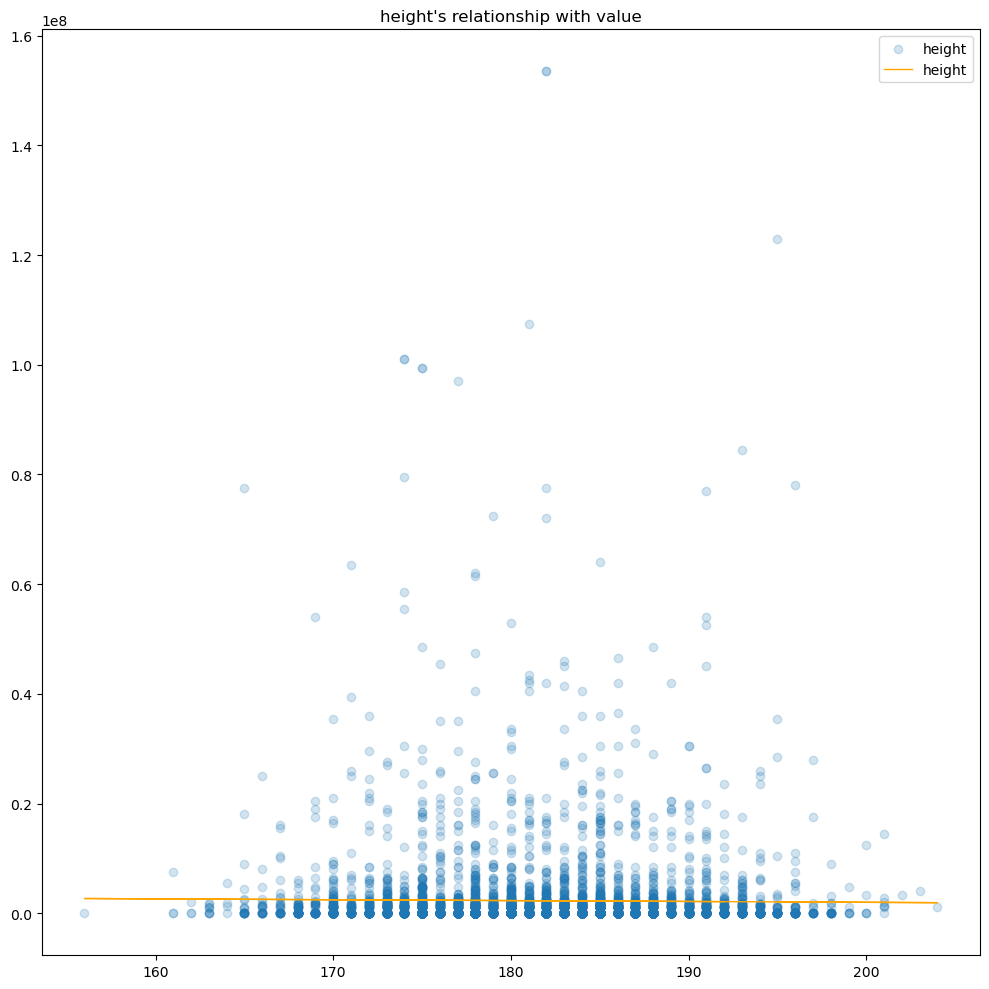

height's relationship with value


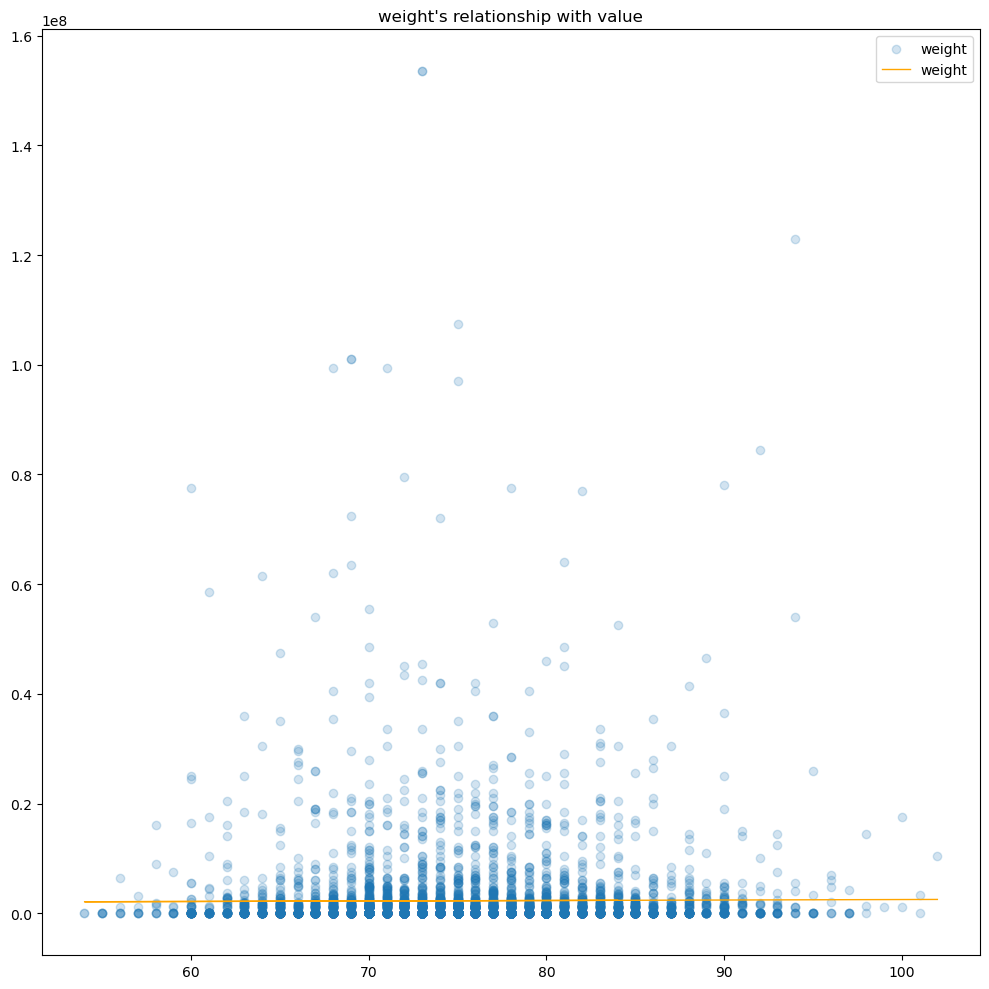

weight's relationship with value


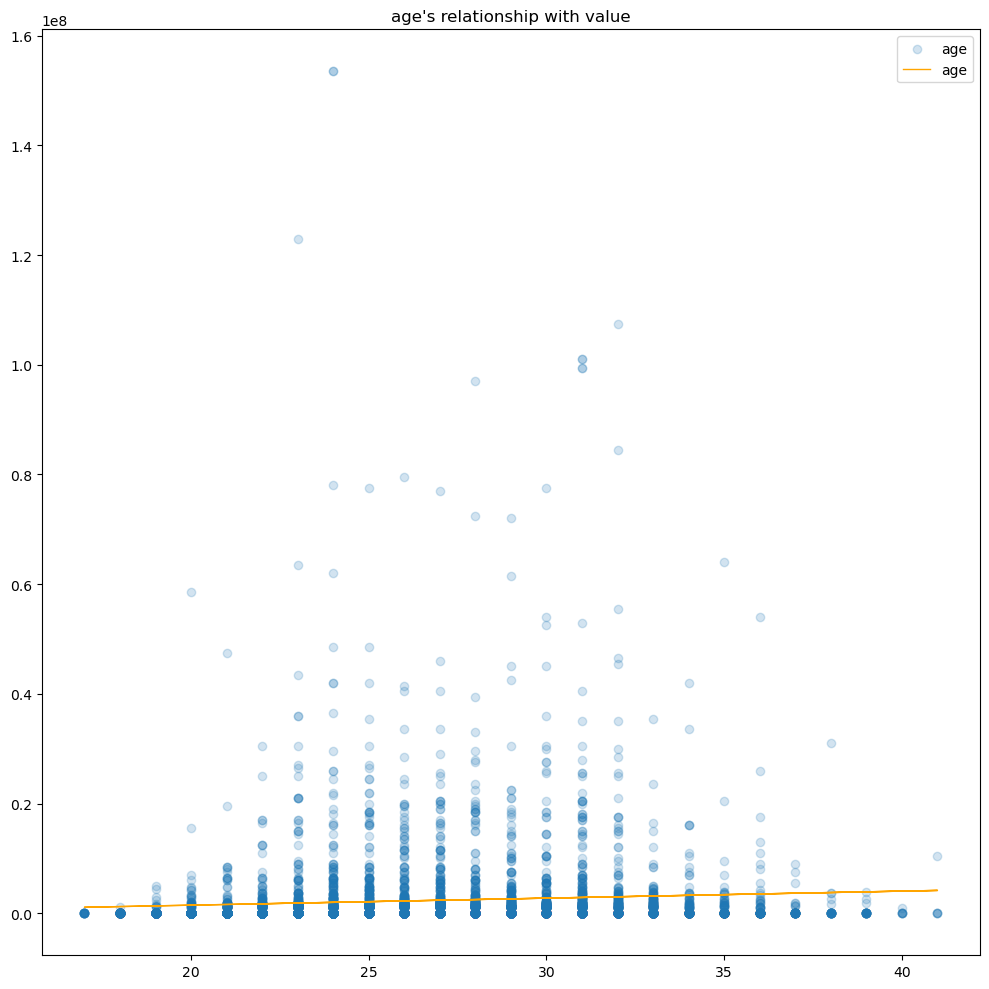

age's relationship with value


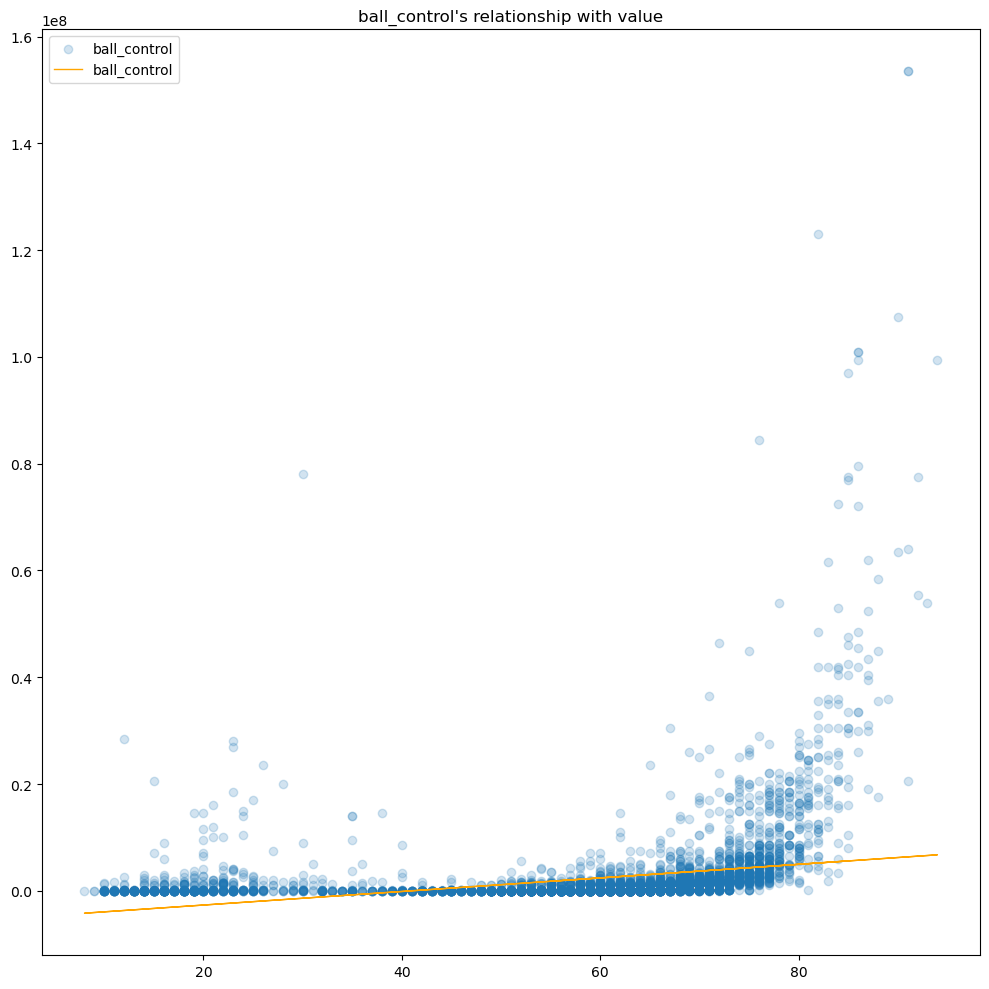

ball_control's relationship with value


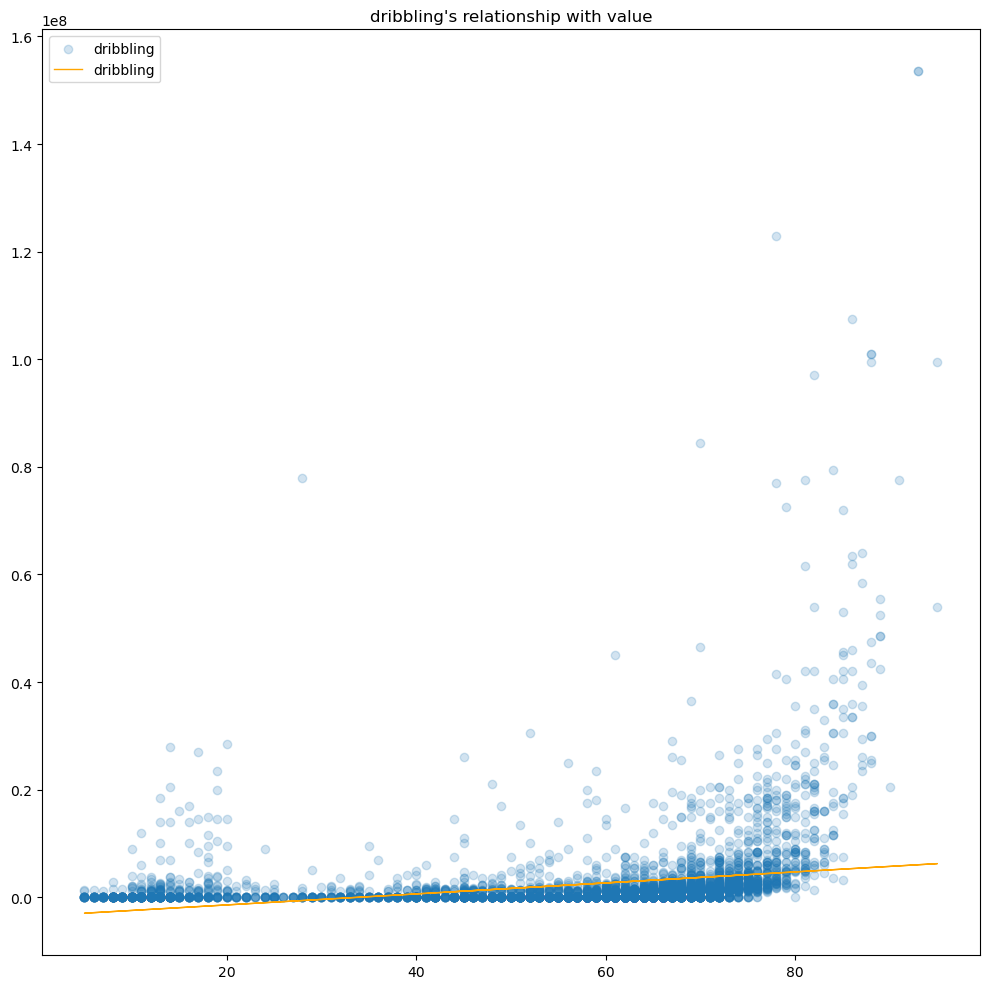

dribbling's relationship with value


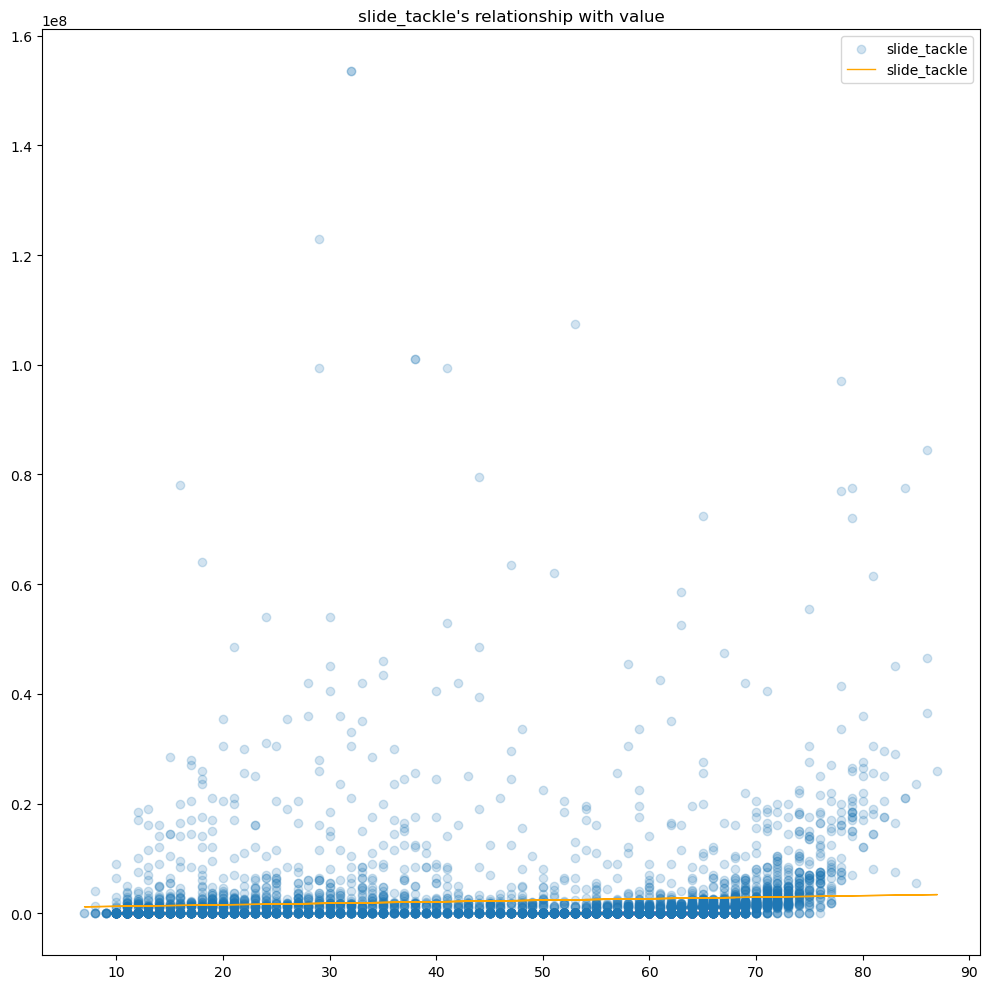

slide_tackle's relationship with value


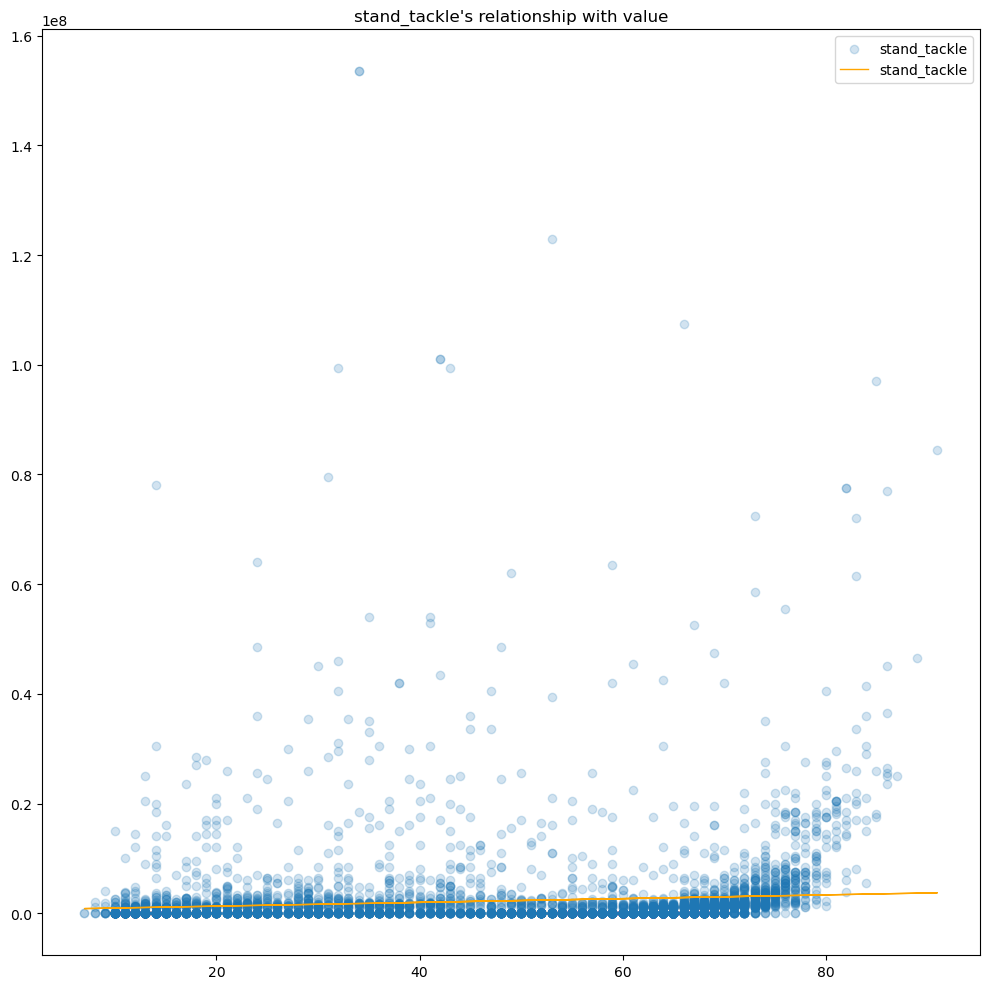

stand_tackle's relationship with value


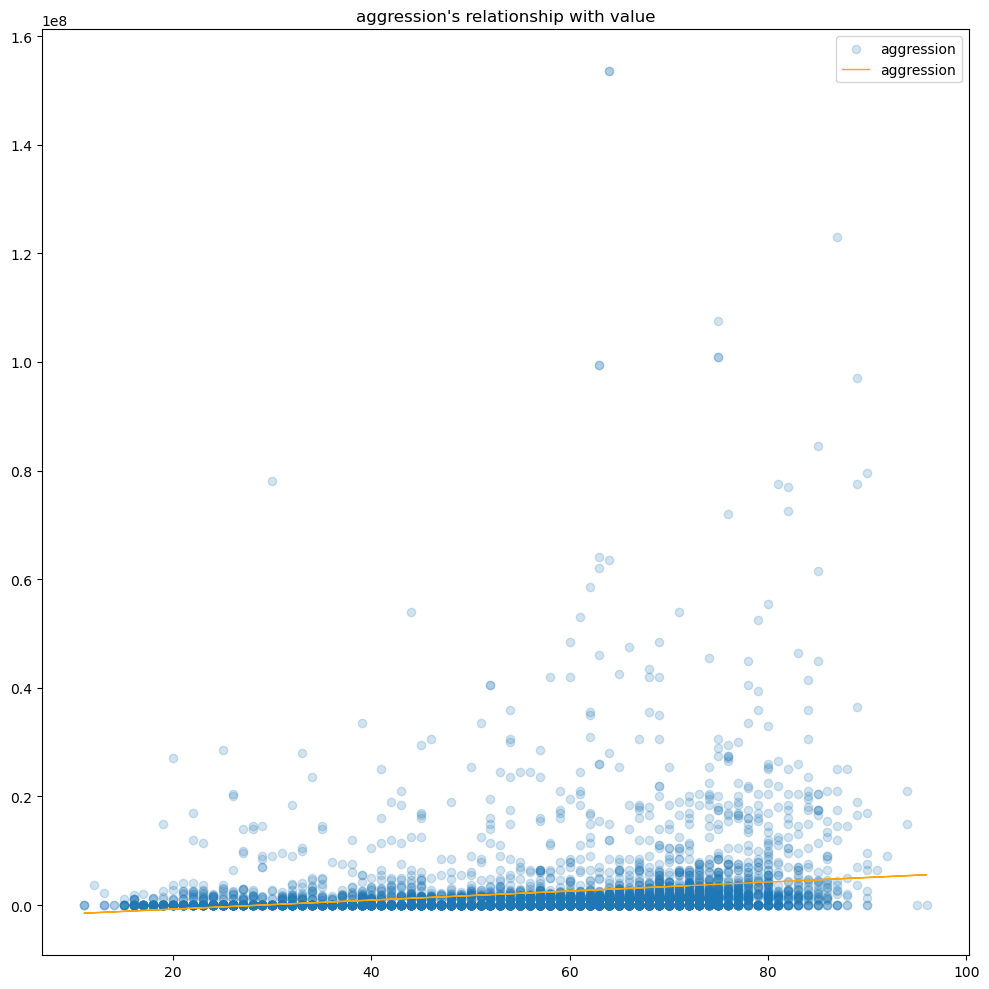

aggression's relationship with value


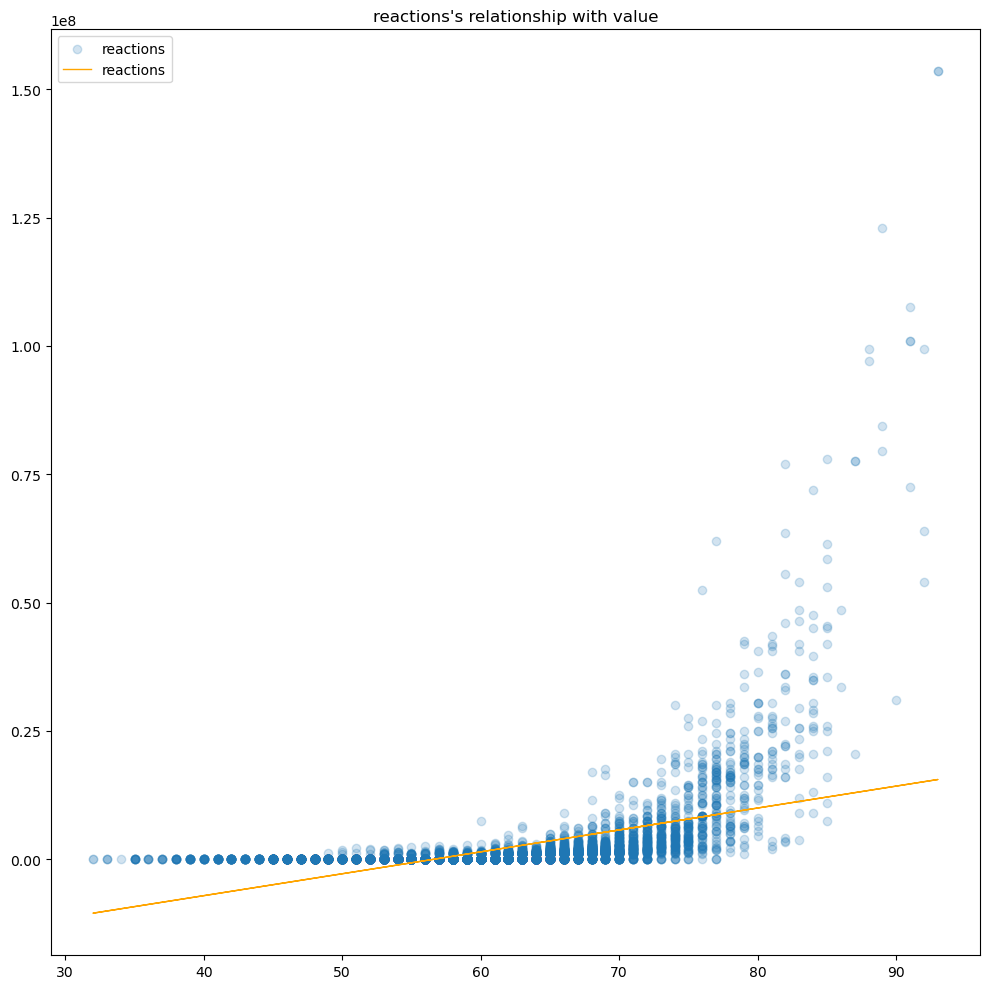

reactions's relationship with value


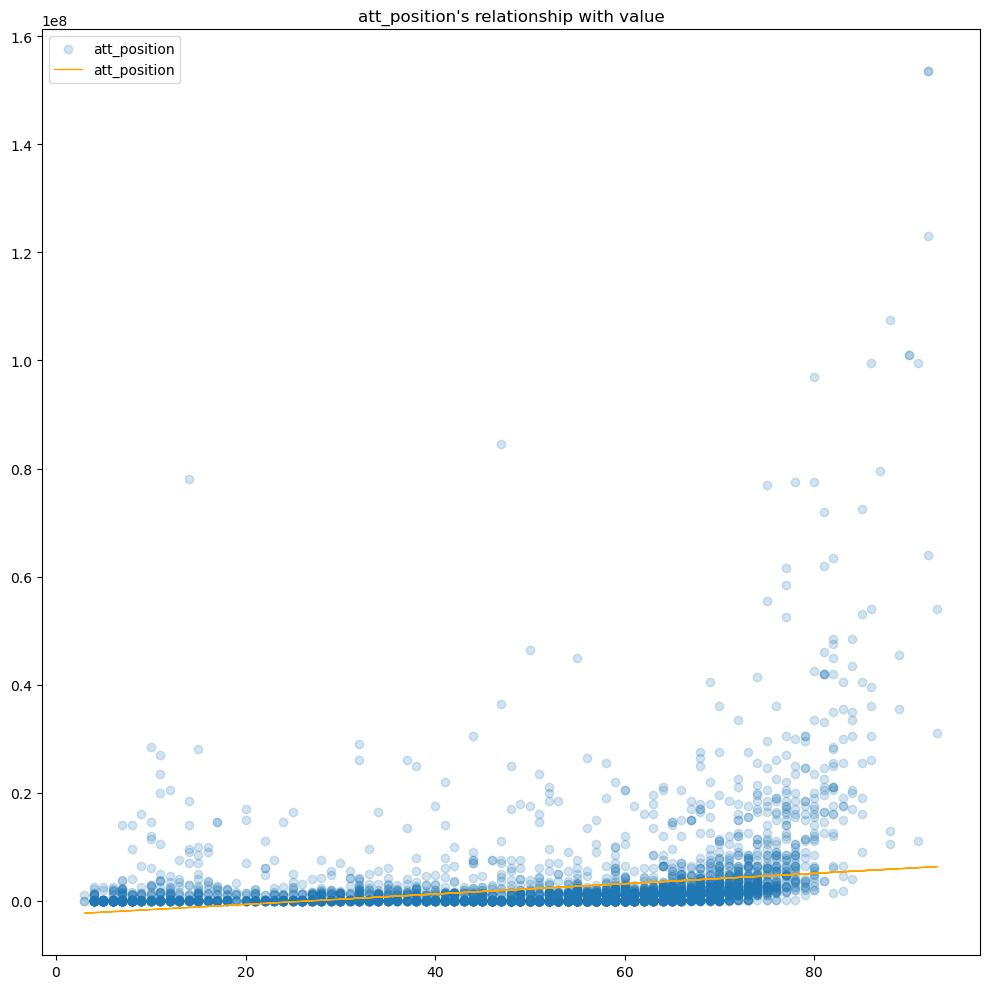

att_position's relationship with value


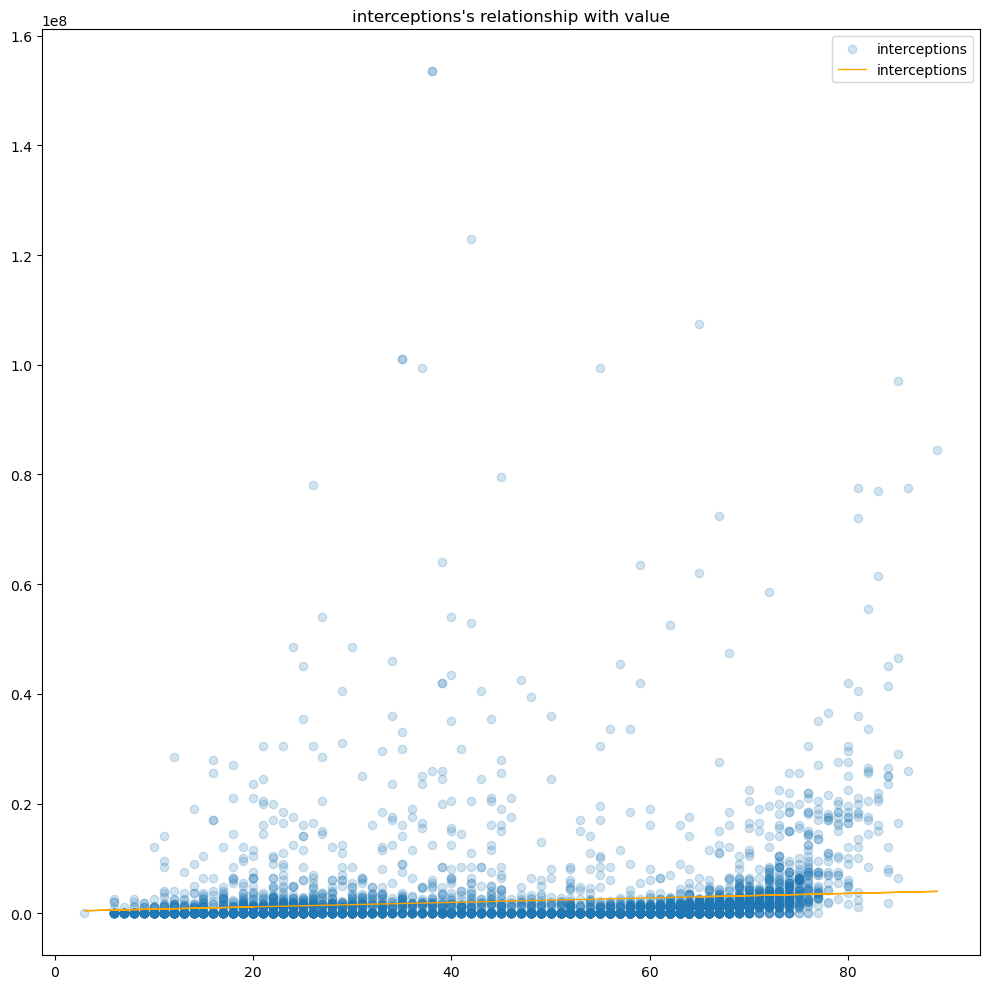

interceptions's relationship with value


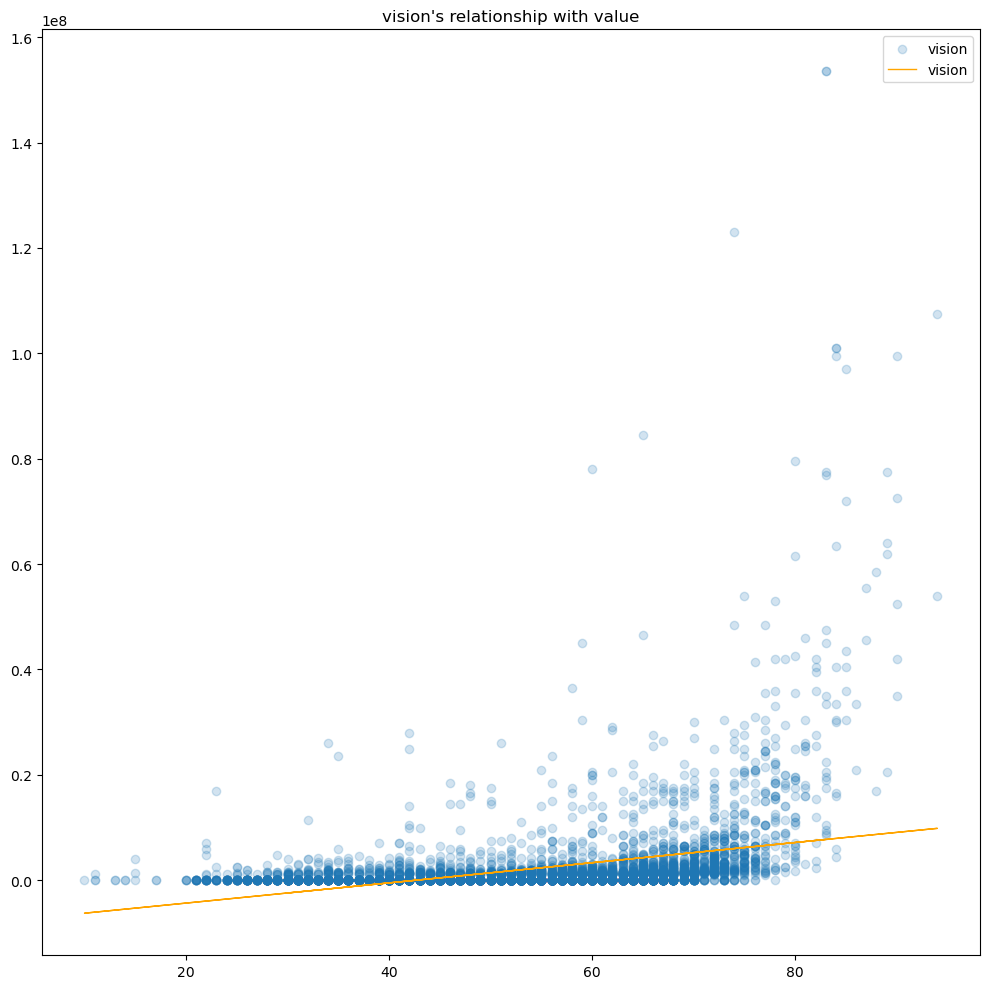

vision's relationship with value


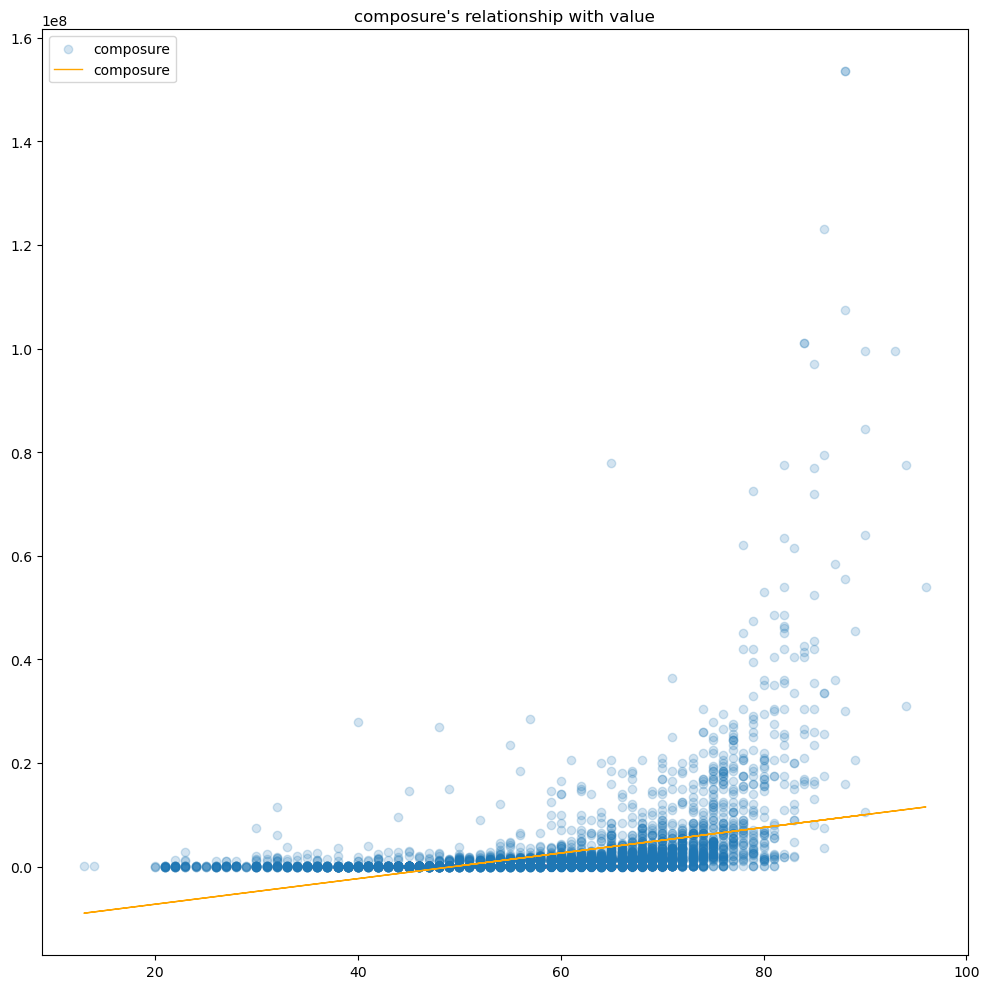

composure's relationship with value


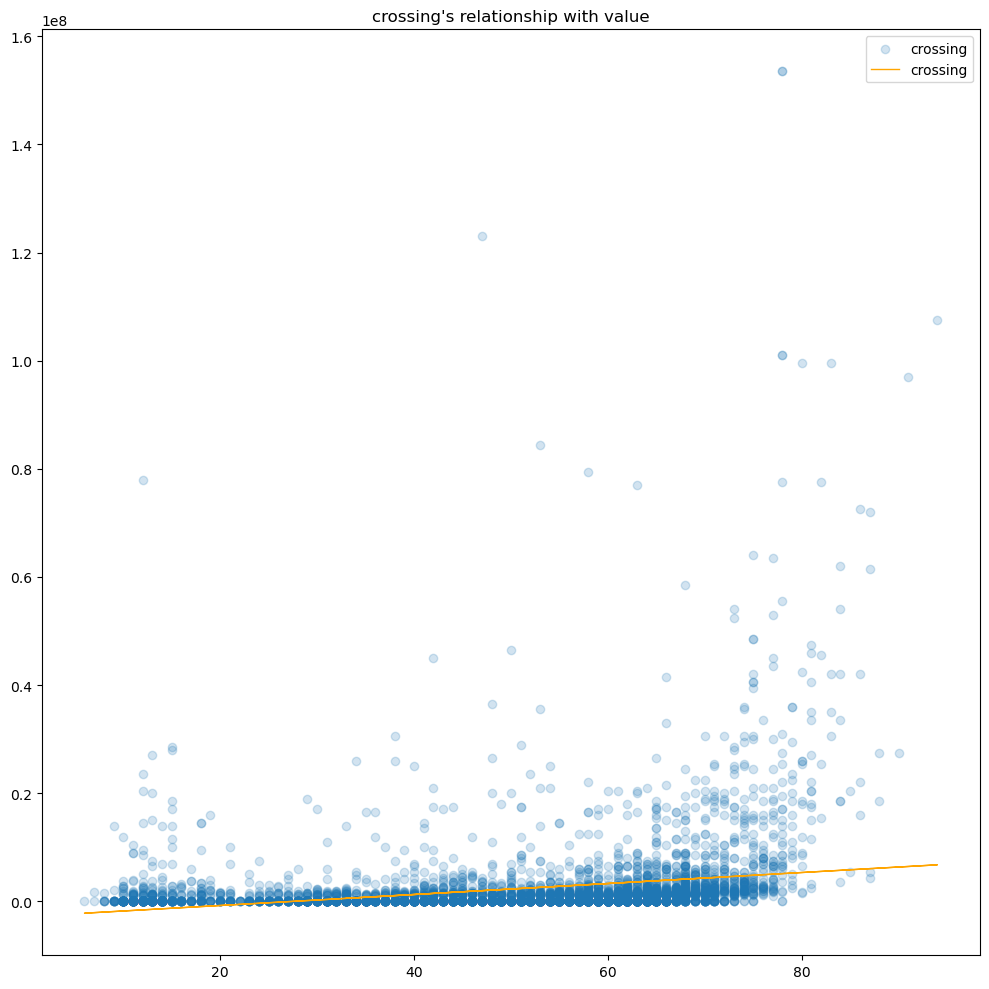

crossing's relationship with value


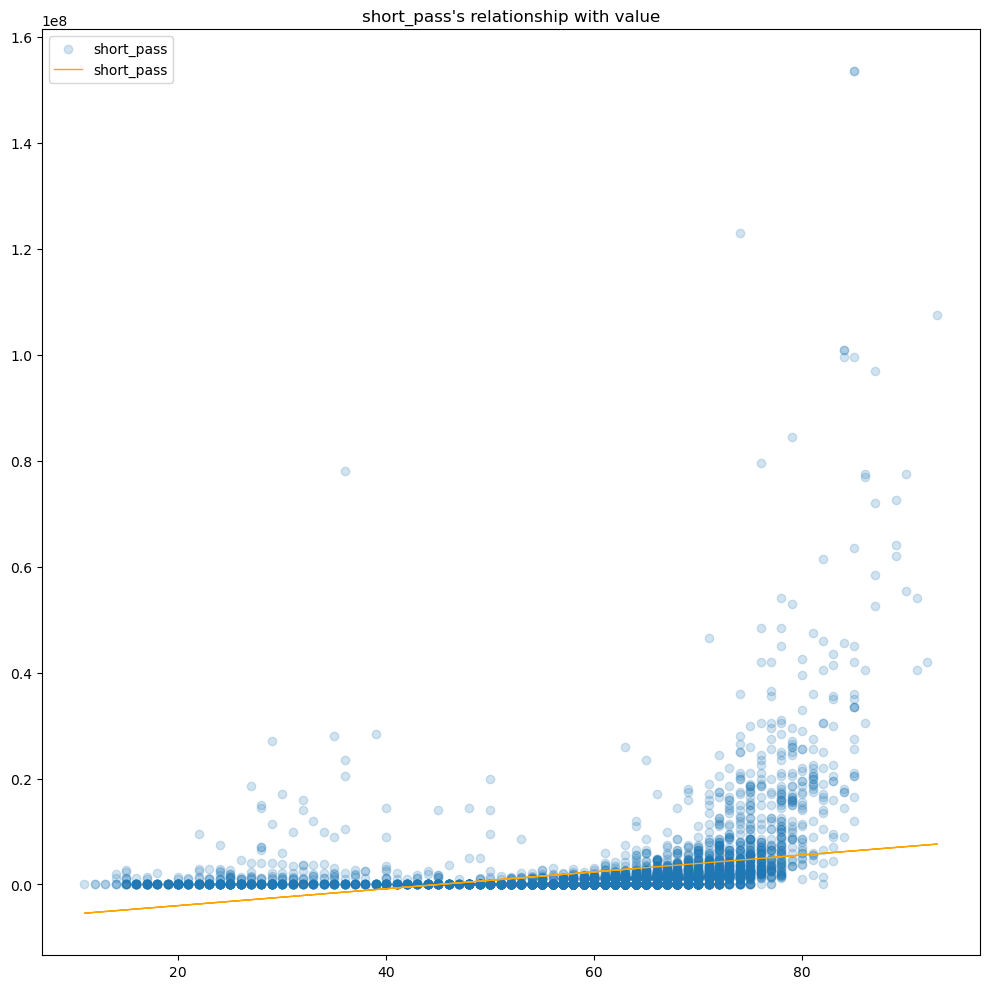

short_pass's relationship with value


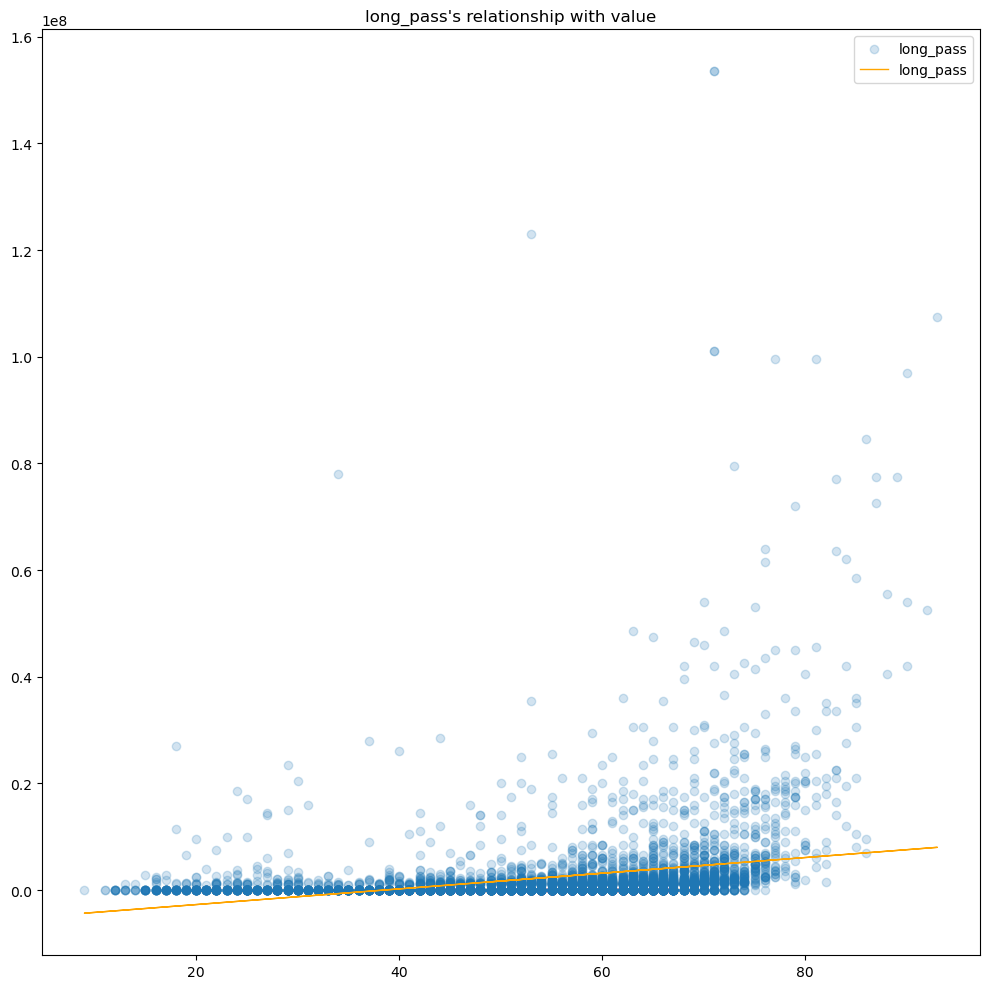

long_pass's relationship with value


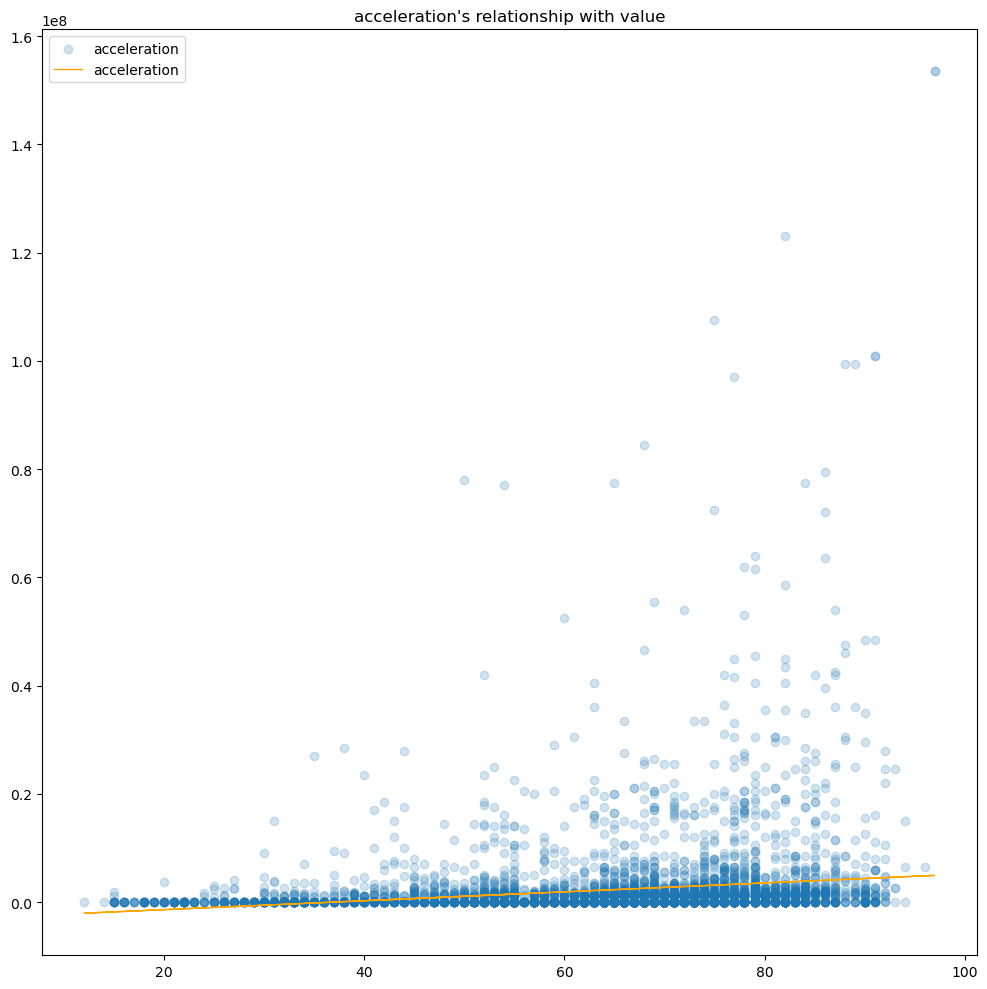

acceleration's relationship with value


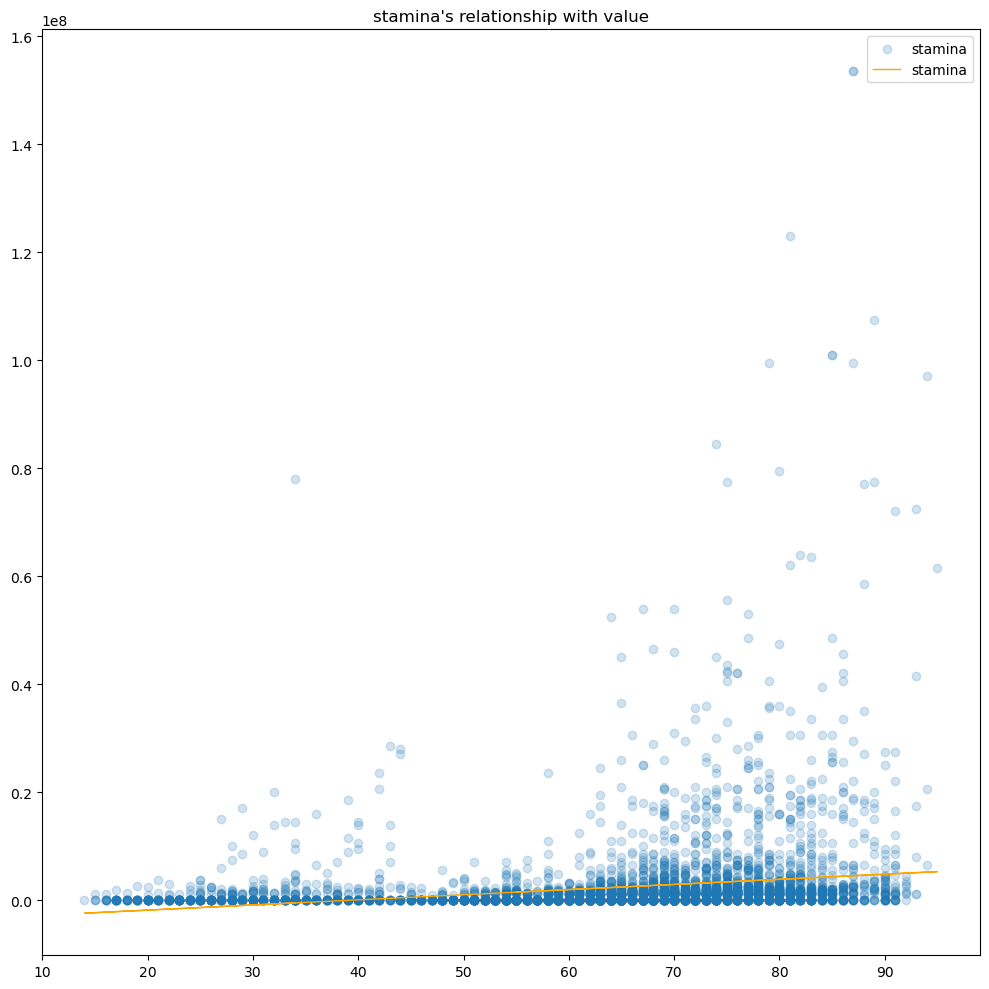

stamina's relationship with value


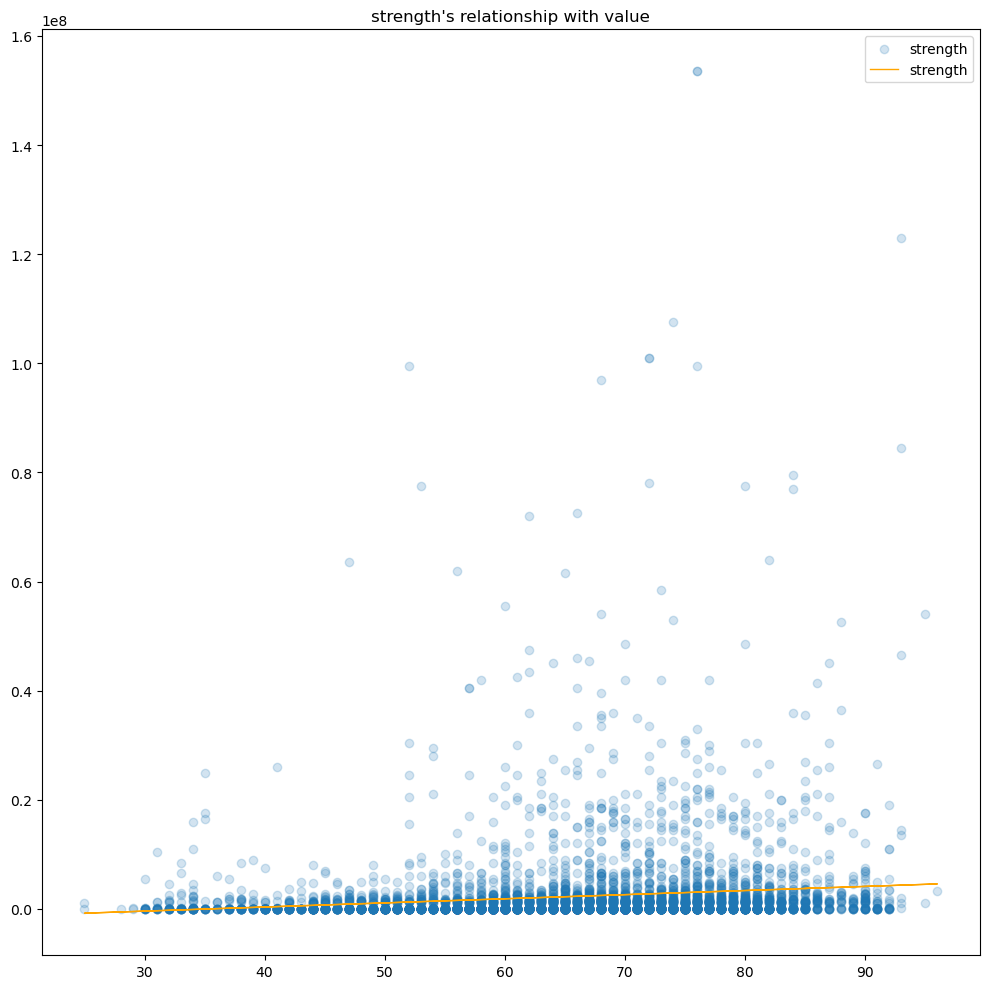

strength's relationship with value


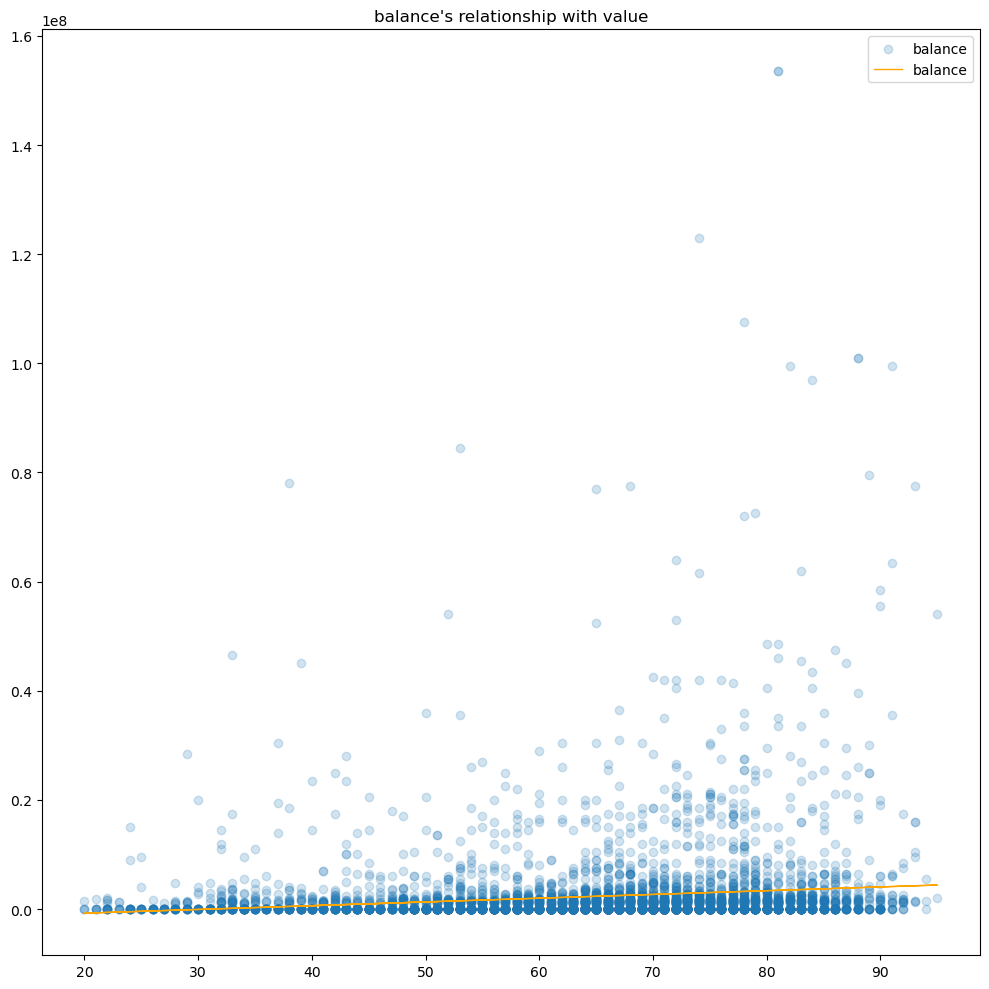

balance's relationship with value


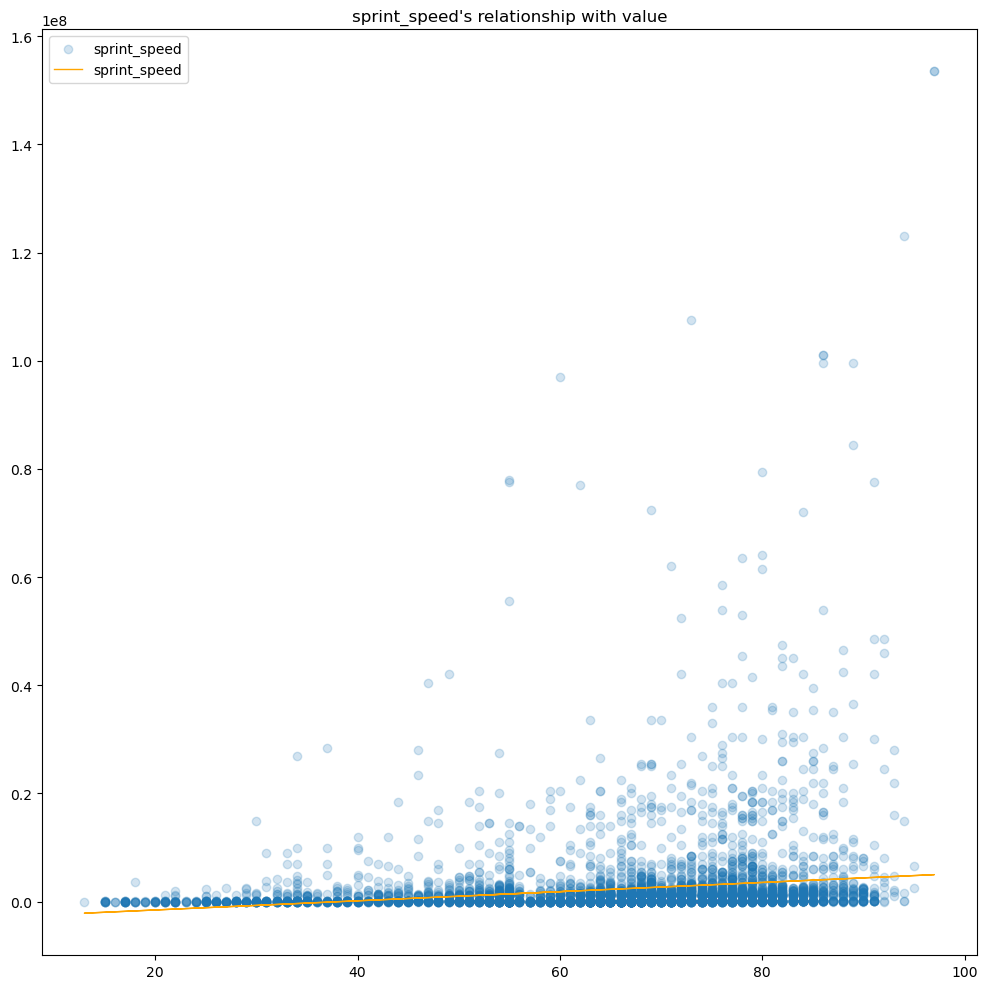

sprint_speed's relationship with value


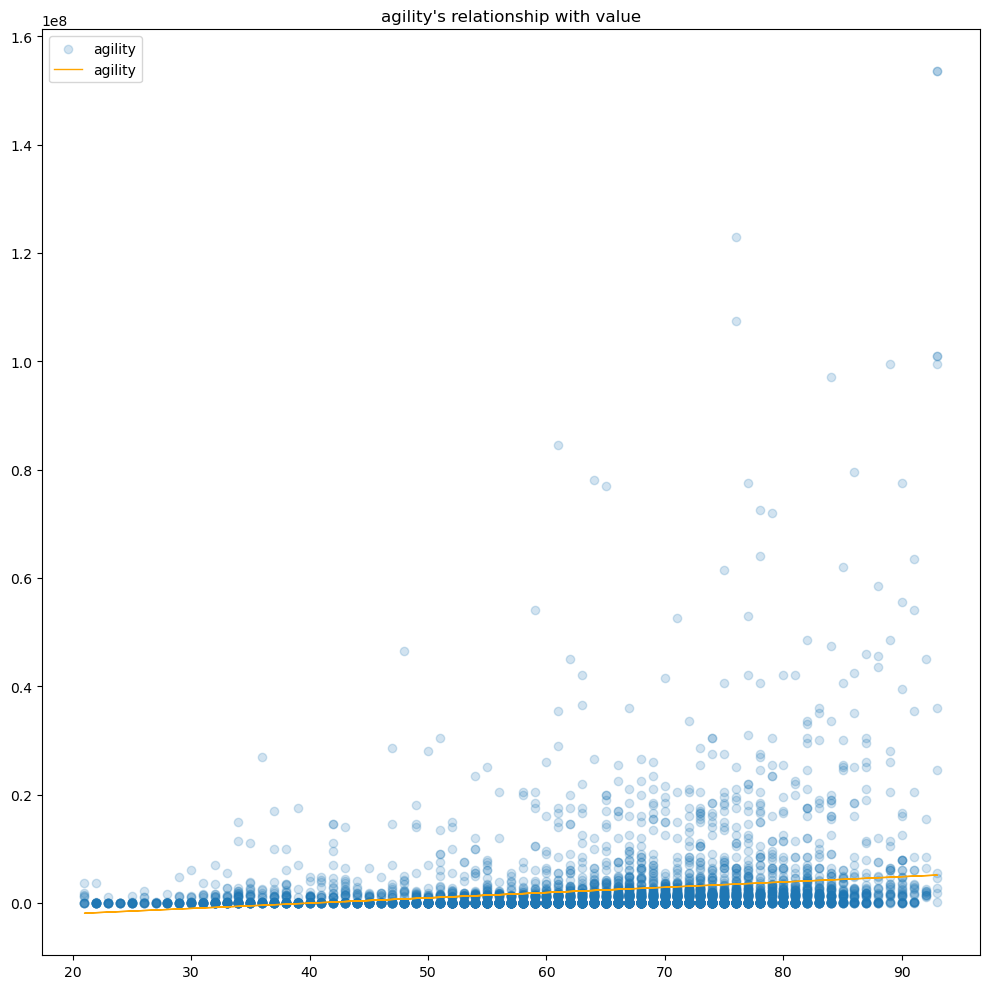

agility's relationship with value


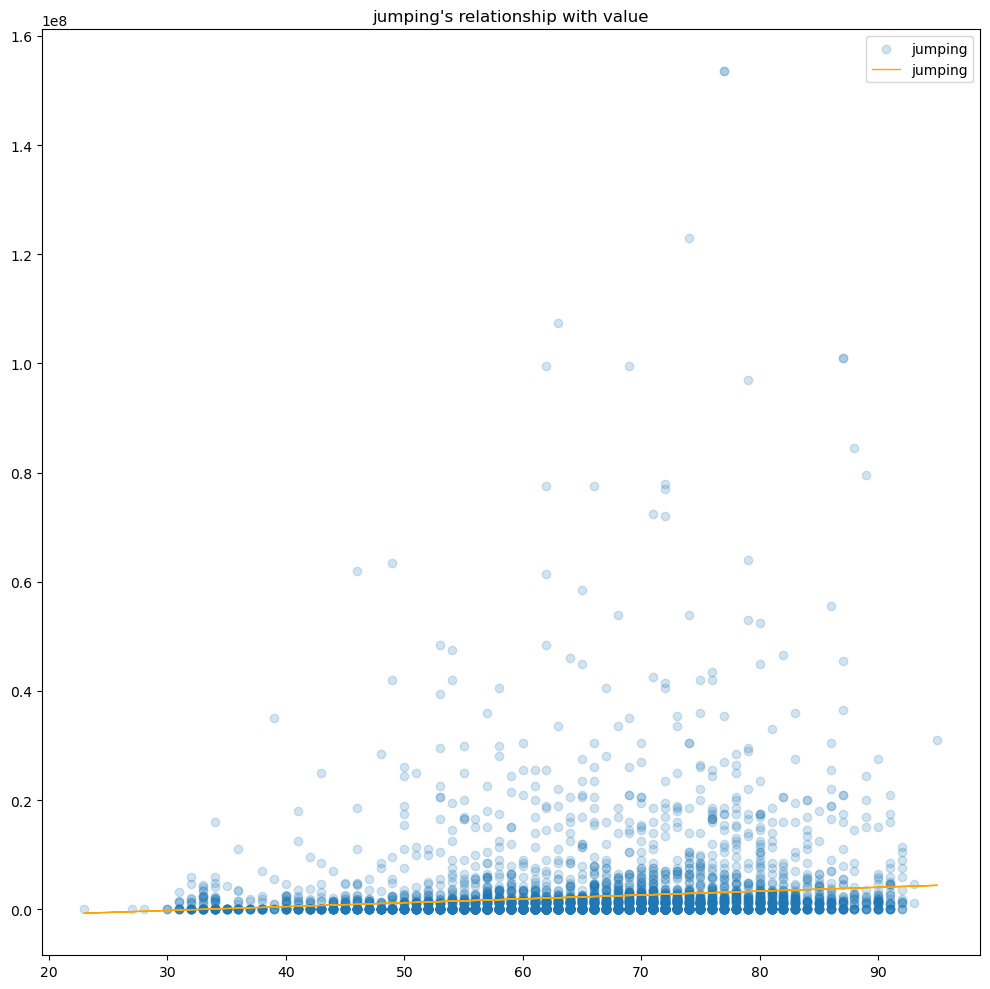

jumping's relationship with value


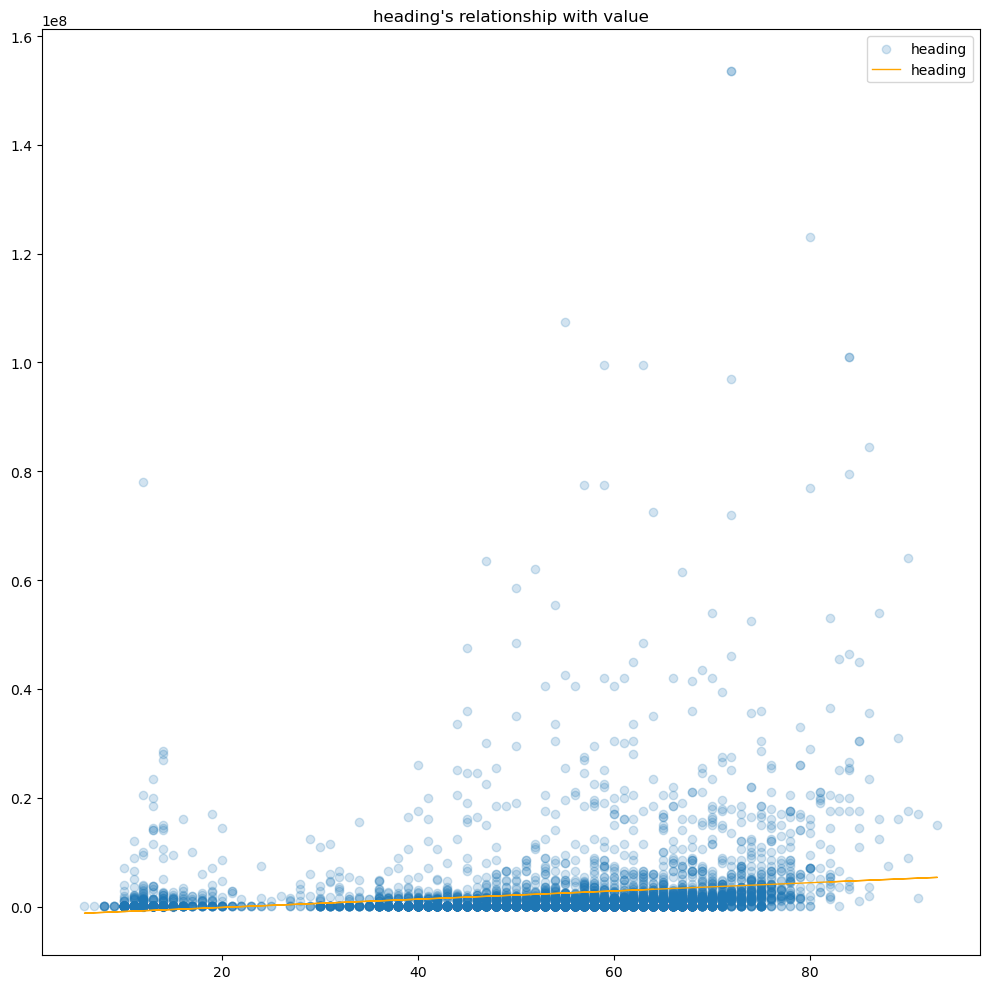

heading's relationship with value


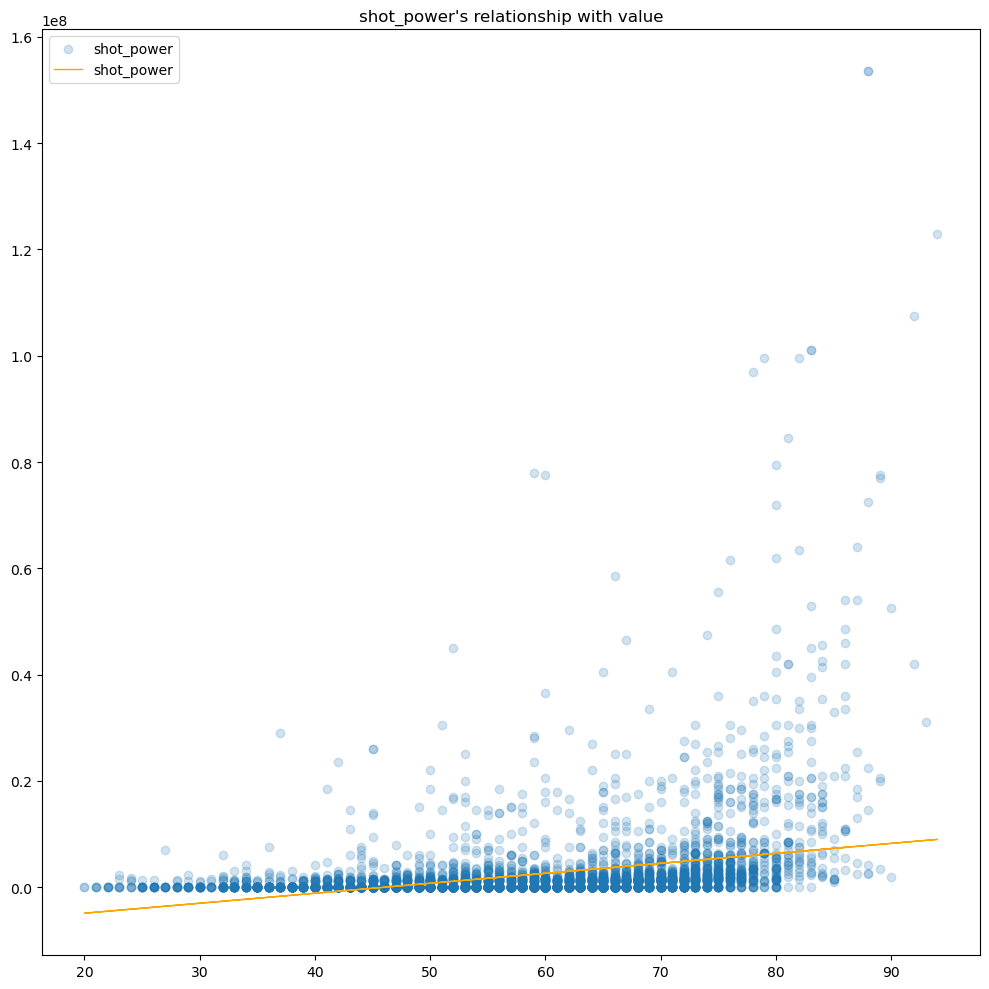

shot_power's relationship with value


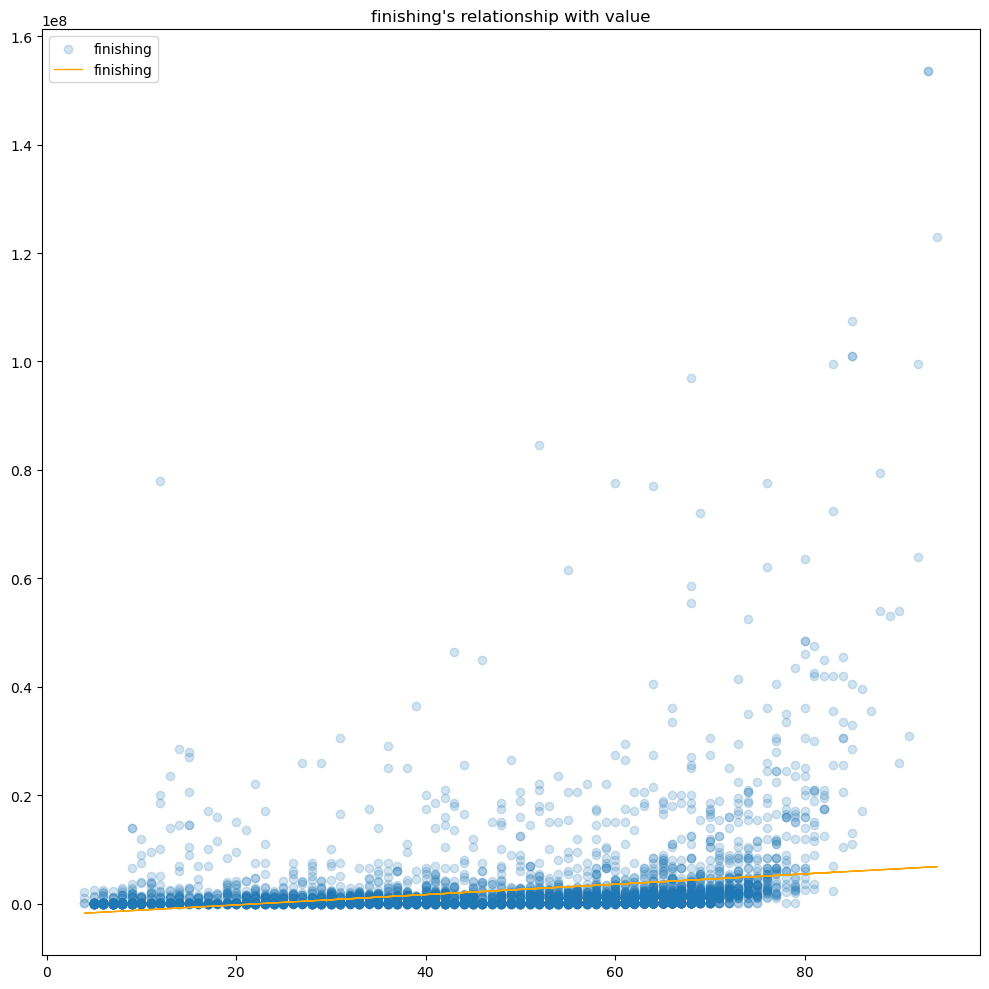

finishing's relationship with value


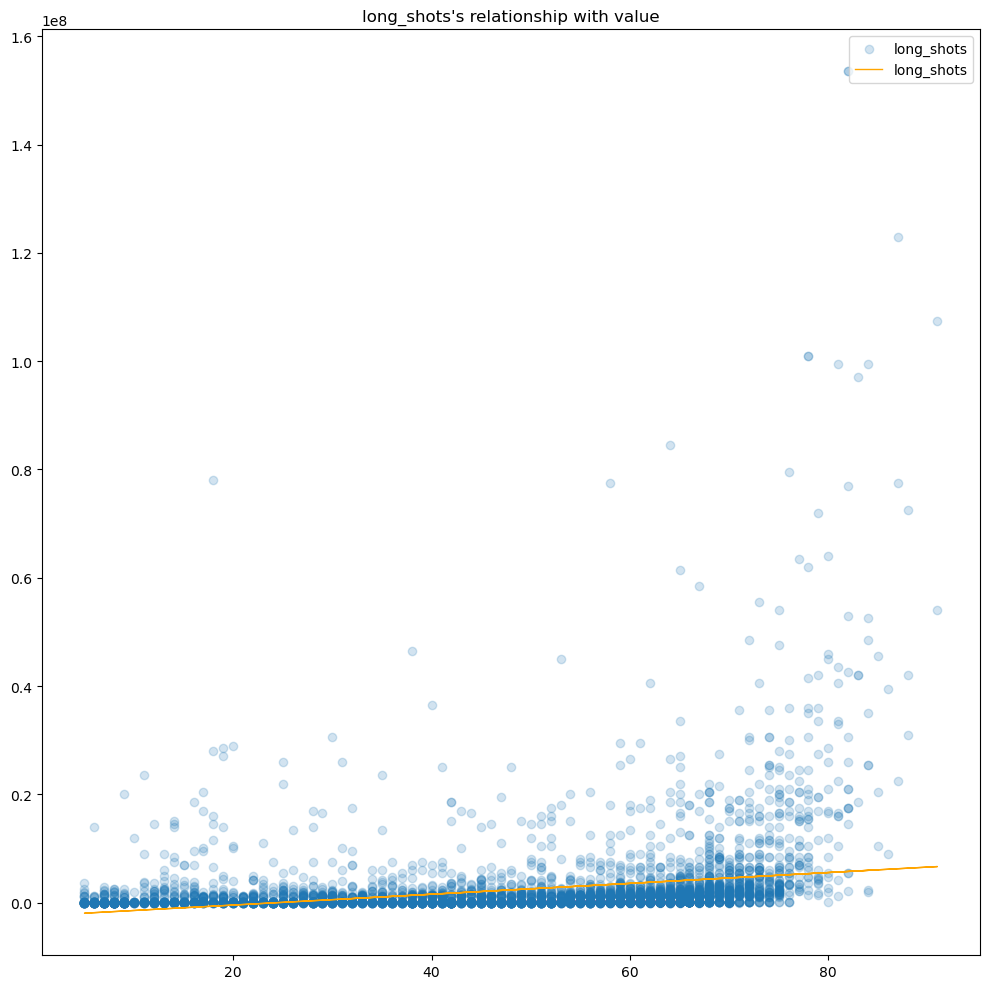

long_shots's relationship with value


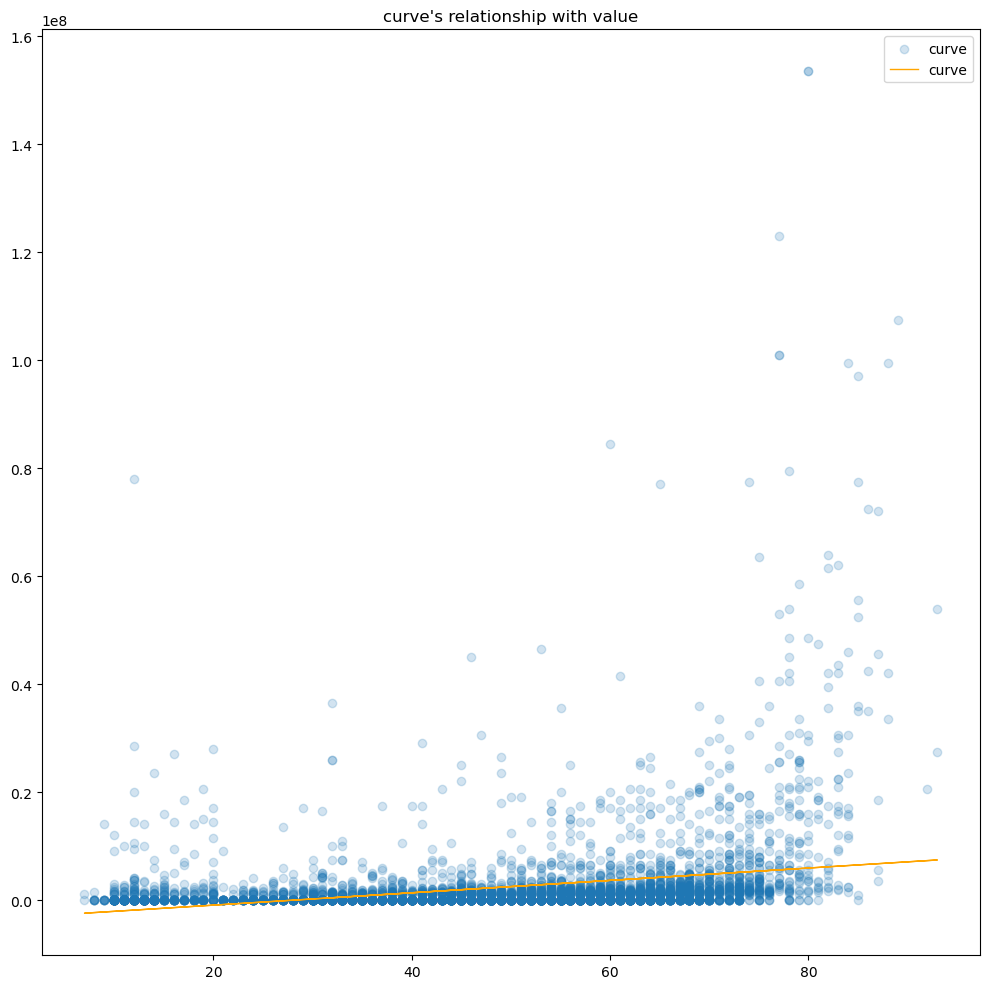

curve's relationship with value


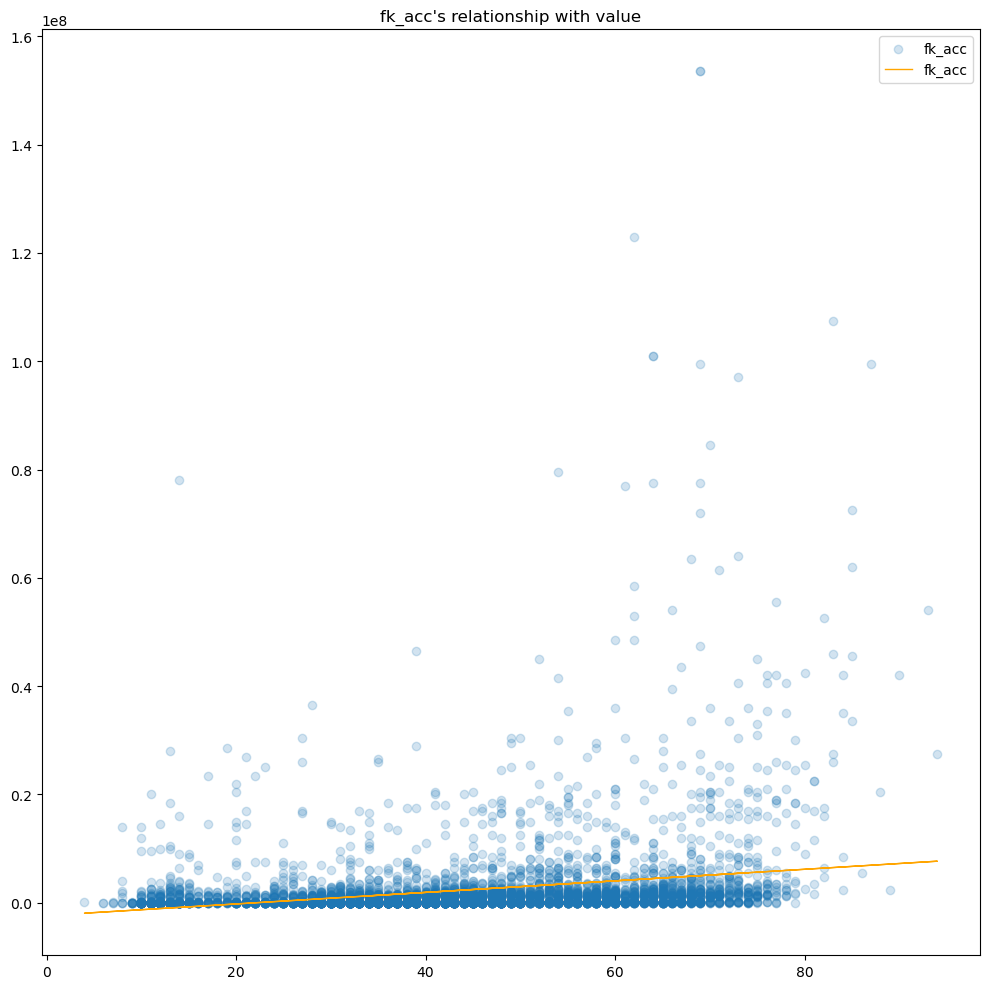

fk_acc's relationship with value


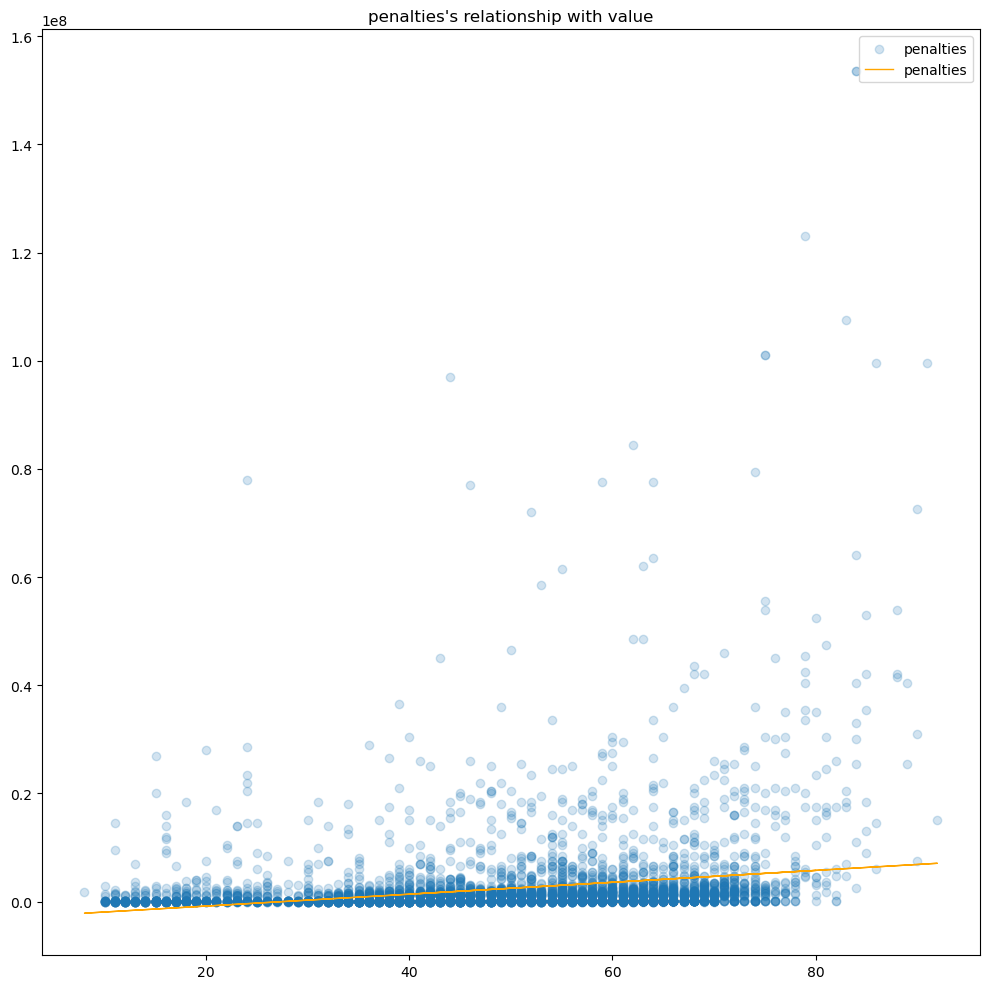

penalties's relationship with value


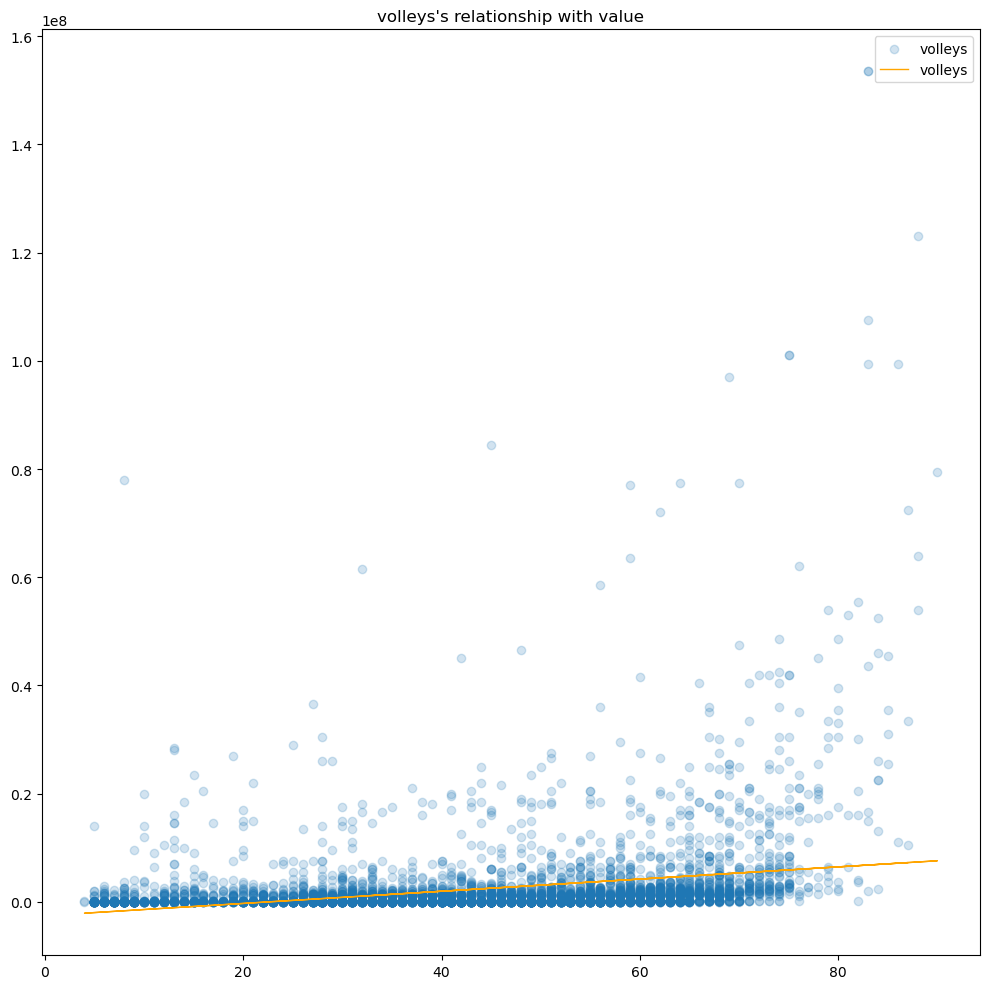

volleys's relationship with value


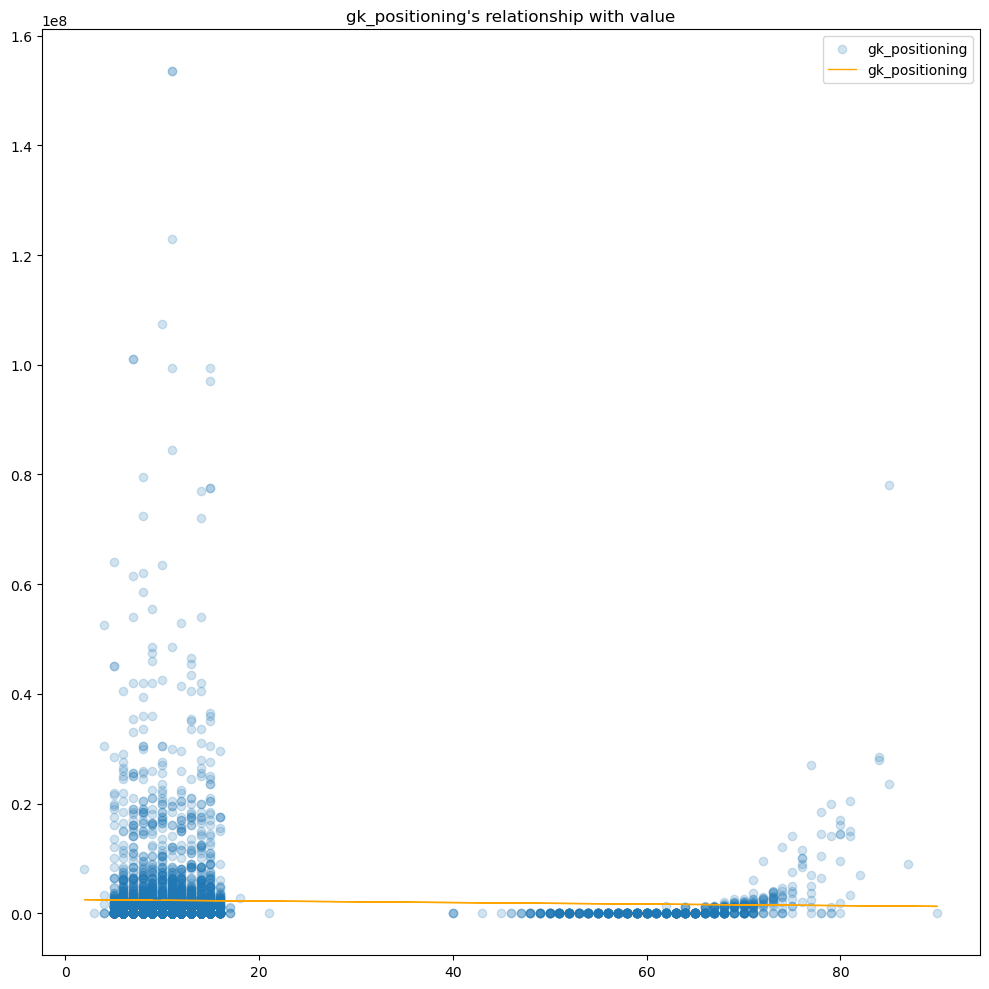

gk_positioning's relationship with value


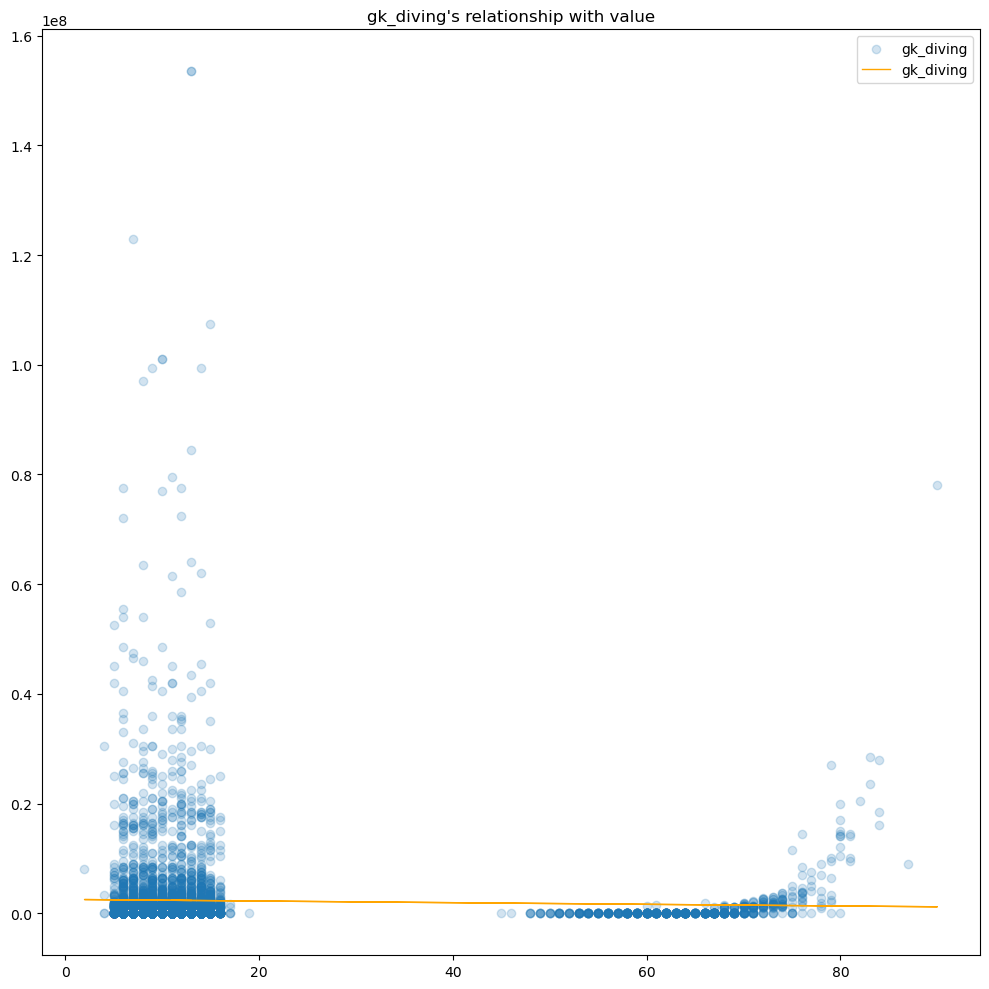

gk_diving's relationship with value


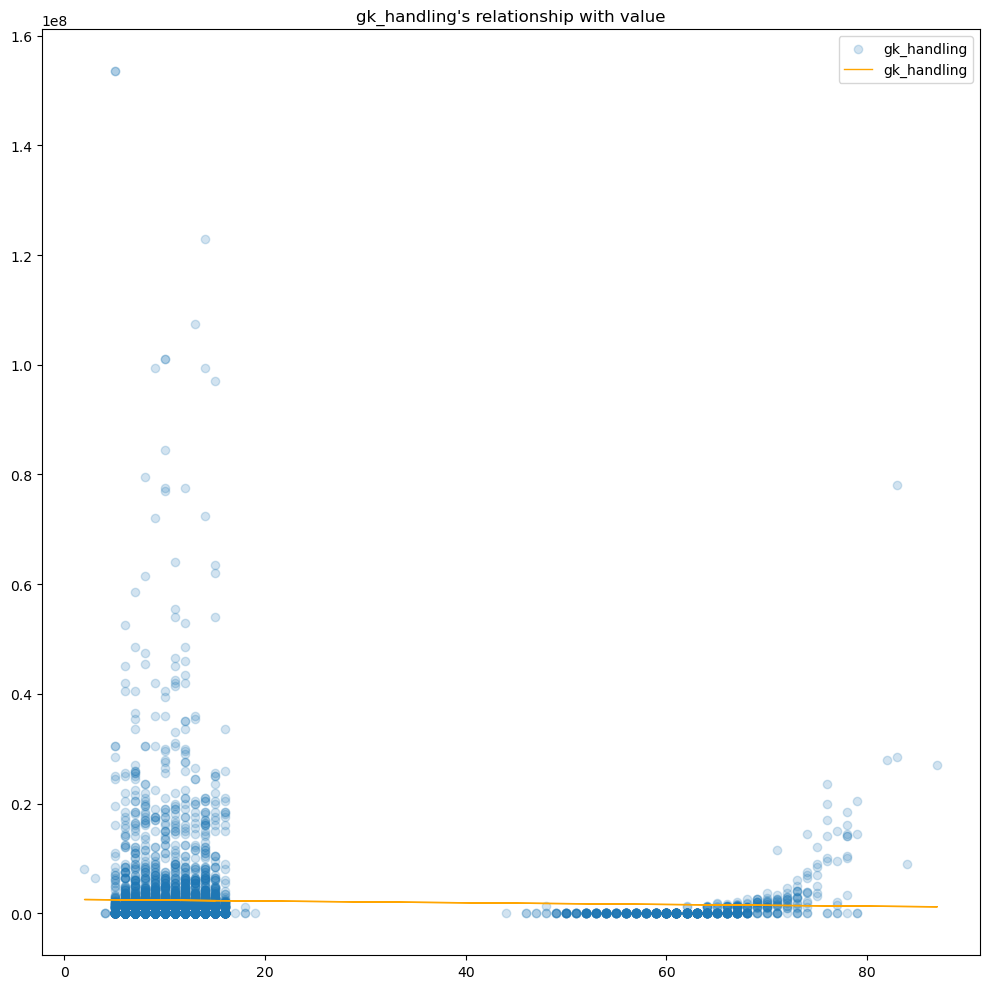

gk_handling's relationship with value


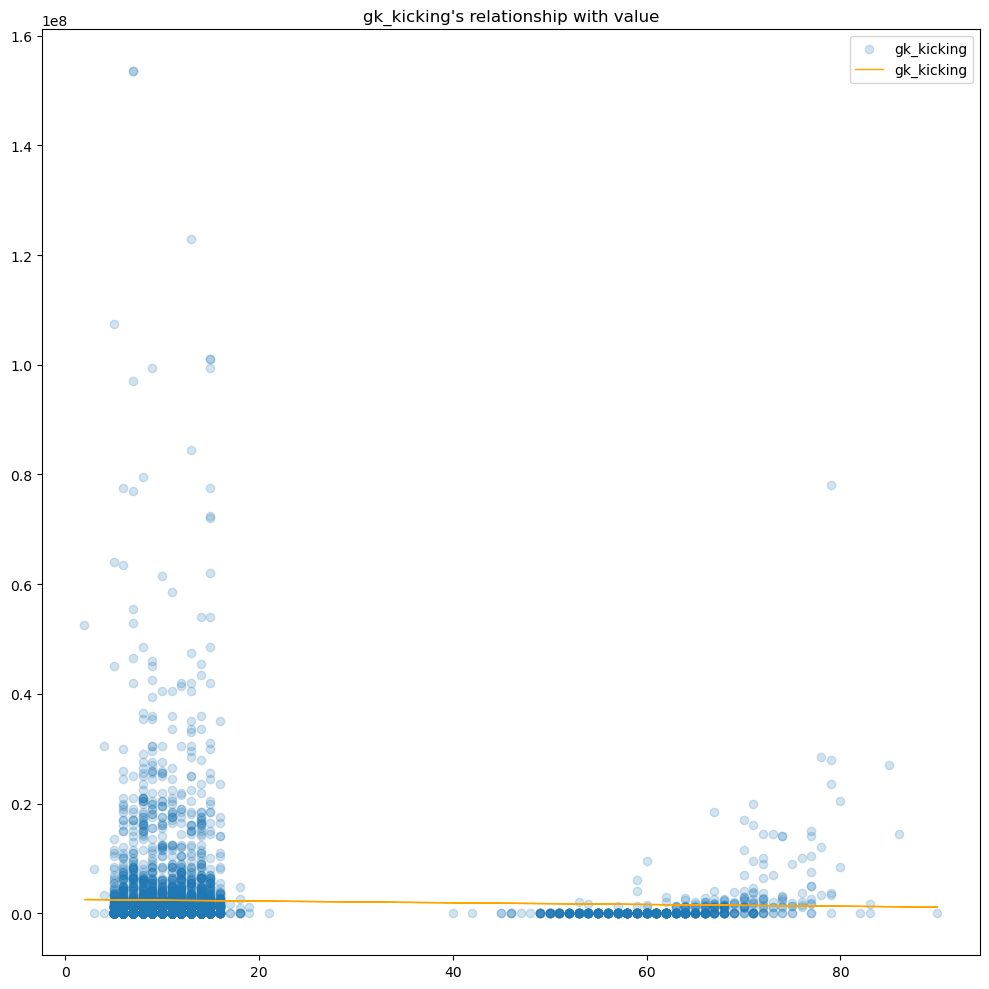

gk_kicking's relationship with value


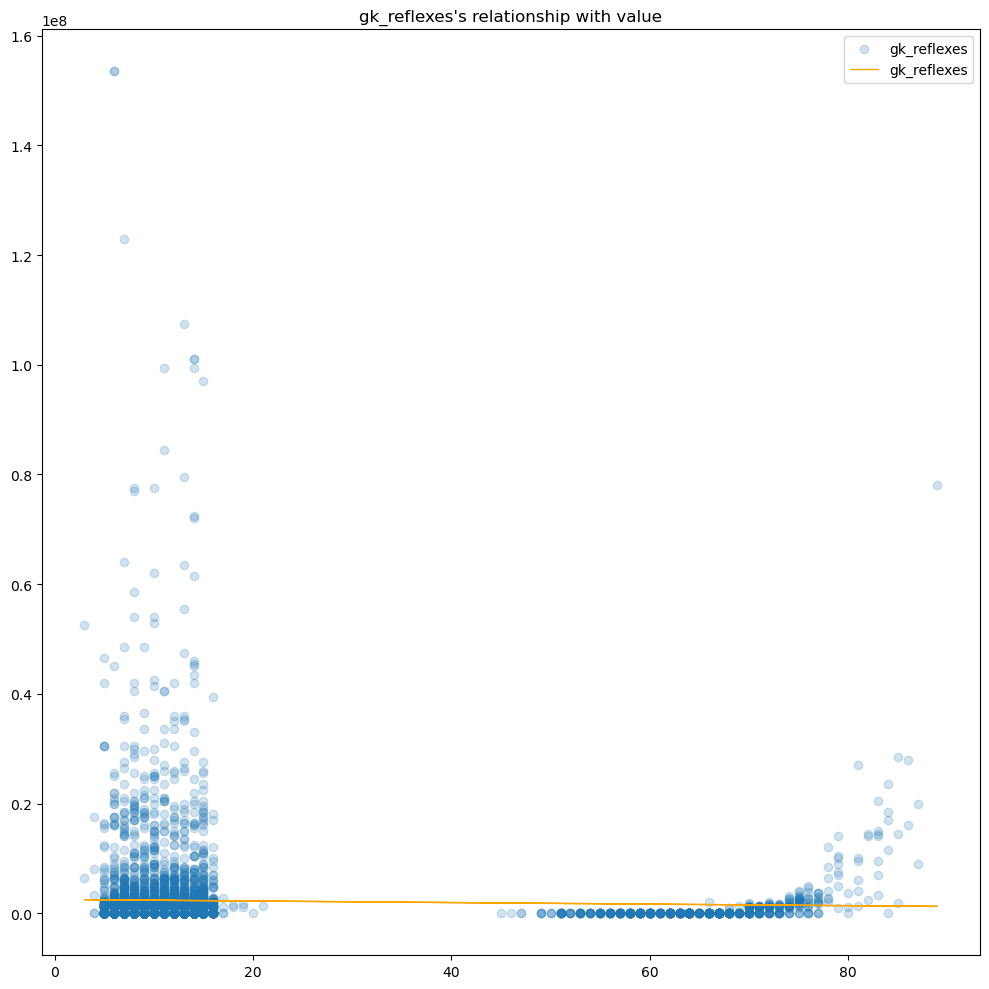

gk_reflexes's relationship with value


In [201]:

print("analysing integer columns relationship with Value column")
index = 0
print(len(XInts.columns))
for c in XInts.columns: 
    
    a, b = np.polyfit(XInts[c], Y, 1)
    
    
    plt.figure(figsize=(10, 10))
    plt.scatter(XInts[c], Y, label=, alpha=0.2)
    plt.plot(XInts[c], a*XInts[c]+b, label=c, color = "orange", linewidth=1)
    plt.title(f'{c}\'s relationship with value')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f'{c}\'s relationship with value')
    index+=1
    #if index >2:
        #break


In [ ]:
#i think this dataset is too easy

In [66]:
df

country  height  weight  age               club  ball_control  \
0     Colombia     192      84   22     Atl. Nacional             55   
1       Brazil     181      80   31       Corinthians             69   
2      Germany     193      84   29     Holstein Kiel             25   
3      Austria     187      86   33     SK Rapid Wien             46   
4      Uruguay     191      80   23     Independiente             14   
...        ...     ...     ...  ...                ...           ...   
5677     Egypt     175      71   31          Liverpool            86   
5678   Senegal     174      69   31  FC Bayern München            86   
5679    Brazil     175      68   31           Paris SG            94   
5680  Portugal     187      83   38           Al Nassr            87   
5681    Sweden     195     102   41              Milan            85   

      dribbling  marking  slide_tackle  stand_tackle  ...  curve  fk_acc  \
0            43      NaN            68            73  ...     32      34   
1            70      NaN            56            58  ...     65      62   
2            12      NaN            13            16  ...     20      15   
3            48      NaN            66            69  ...     25      13   
4             8      NaN            14            16  ...      9      10   
...         ...      ...           ...           ...  ...    ...     ...   
5677         88      NaN            41            43  ...     84      69   
5678         88      NaN            38            42  ...     77      64   
5679         95      NaN            29            32  ...     88      87   
5680         81      NaN            24            32  ...     79      75   
5681         75      NaN            24            37  ...     79      74   

      penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0            41       33              10         11            6           7   
1            48       46              12         15           14           8   
2            26       16              64         74           65          68   
3            22       19              10         10            8          14   
4            16        5              61         59           62          64   
...         ...      ...             ...        ...          ...         ...   
5677         86       83              11         14           14           9   
5678         75       75               7         10           10          15   
5679         91       86              15          9            9          15   
5680         90       85              14          7           11          15   
5681         80       87               9         13           15          10   

      gk_reflexes         value  
0               9    $1.400.000  
1              14      $975.00   
2              74    $1.100.000  
3               9      $650.00   
4              64      $300.00   
...           ...           ...  
5677           14   $99.500.000  
5678           14  $101.000.000  
5679           11   $99.500.000  
5680           11   $31.000.000  
5681           12   $10.500.000  

[5682 rows x 40 columns]